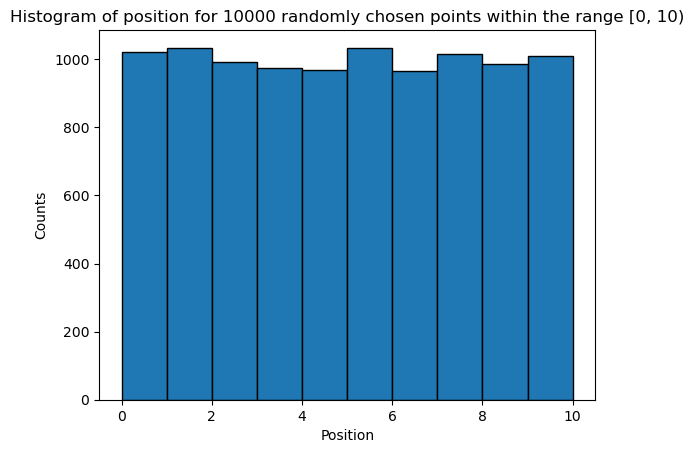

In [1]:
# 1.1 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

# set L
L = 10

# generate random numbers in the range [0, L)
random_numbers = np.random.uniform(0, L, size=10000)

# create and plot histogram
plt.hist(random_numbers, bins=10, edgecolor='black')
plt.title('Histogram of position for 10000 randomly chosen points within the range [0, 10)')
plt.xlabel('Position')
plt.ylabel('Counts')
plt.show()

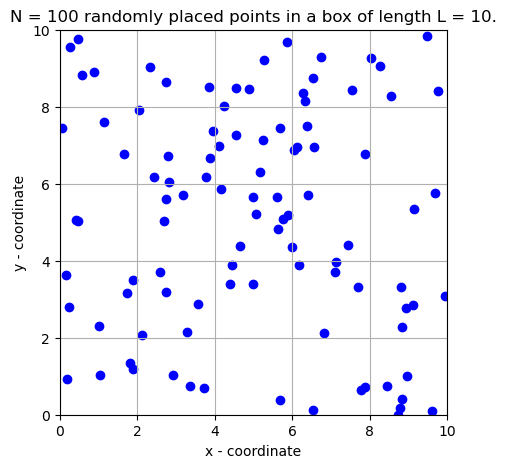

In [2]:
# 1.1 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math

def place_objects(N, L):
    """
    randomly place N objects in a square box of length L 
    returns array of coordinates of placed objects
    """
    coordinates = np.random.uniform(0, L, size=(N, 2))
    return coordinates

N = 100
L = 10
object_coordinates = place_objects(N, L)

# plot
plt.figure(figsize=(5, 5))
plt.scatter(object_coordinates[:, 0], object_coordinates[:, 1], c='blue', marker='o')
plt.xlim(0, L)
plt.ylim(0, L)
plt.title(f'N = {N} randomly placed points in a box of length L = {L}.')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.grid(True)
plt.show()

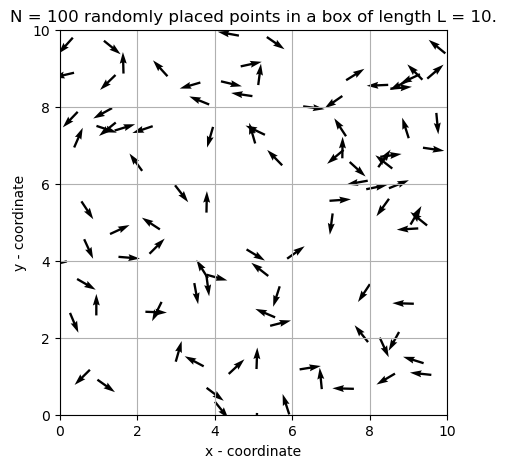

In [2]:
# 1.1 Problems, #3

import numpy as np
import matplotlib.pyplot as plt
import math

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

N = 100  
L = 10
x, y, theta = initialize(N, L)

plt.figure(figsize=(5, 5))
plt.quiver(x, y, np.cos(theta), np.sin(theta))
plt.xlim(0, L)
plt.ylim(0, L)
plt.title(f'N = {N} randomly placed points in a box of length L = {L}.')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.grid(True)
plt.show()

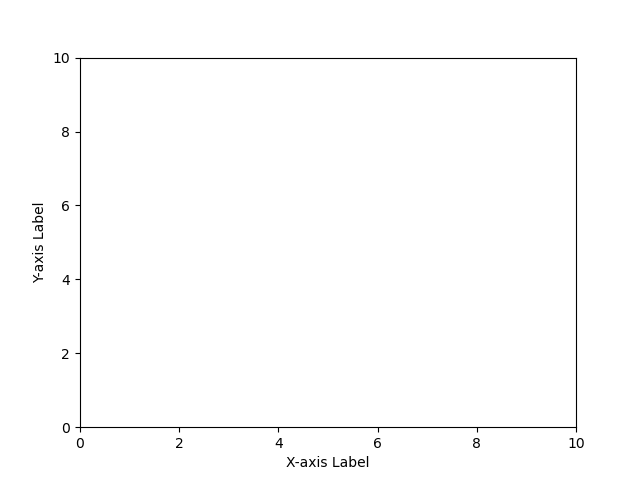

In [2]:
# 1.2 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib ipympl
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

# update the position with periodic boundaries
def update_position(x, y, theta, v, delta_t, L):
    x_new = (x + v * np.cos(theta) * delta_t) % L
    y_new = (y + v * np.sin(theta) * delta_t) % L
    return x_new, y_new

# simulation parameters
L = 10
N = 1
v = 1
delta_t = 1
Nsteps = 100

x, y, theta = initialize(N, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('X-axis Label') 
ax.set_ylabel('Y-axis Label')

# update function for the animation
def update(frame):
    global x, y, theta
    # updating particle's position
    x, y = update_position(x, y, theta, v, delta_t, L)
    
    # clear previous plot
    ax.cla()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_xlabel('X-axis Label') 
    ax.set_ylabel('Y-axis Label')

    # plotting new position
    ax.quiver(x, y, np.cos(theta), np.sin(theta), color='black')

# animation object
ani = FuncAnimation(fig, update, frames=np.arange(Nsteps), interval=500)

plt.show()

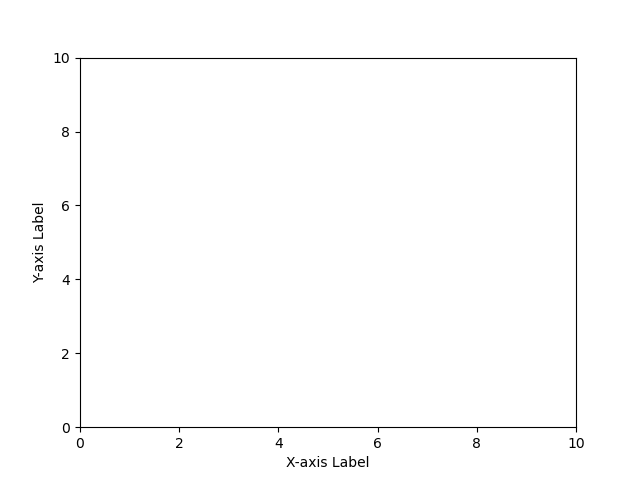

In [3]:
# 1.2 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib ipympl
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

def update_position_with_noise(x, y, theta, v, delta_t, L, eta):
    # update orientation with noise
    delta_theta = np.random.uniform(-eta/2, eta/2)
    theta_new = theta + delta_theta

    # update the position with periodic boundaries
    x_new = (x + v * np.cos(theta_new) * delta_t) % L
    y_new = (y + v * np.sin(theta_new) * delta_t) % L

    return x_new, y_new, theta_new

# simulation parameters
L = 10
N = 1
v = 1
delta_t = 1
Nsteps = 100
eta = 3  # angular noise

x, y, theta = initialize(N, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')  

# update function for the animation
def animate(step):
    global x, y, theta
    # updating particle's position with noise
    x, y, theta = update_position_with_noise(x, y, theta, v, delta_t, L, eta)

    # clear previous plot
    ax.cla()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_xlabel('X-axis Label') 
    ax.set_ylabel('Y-axis Label')  

    
    # plotting new position with noise
    ax.quiver(x, y, np.cos(theta), np.sin(theta), color='black')

# animation object
ani = FuncAnimation(fig, animate, frames=Nsteps, interval=500, repeat=False)

plt.show()

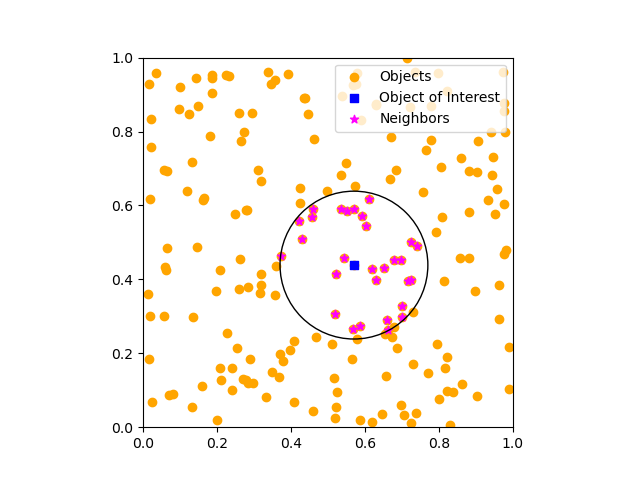

In [3]:
# 2 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

def find_neighbors(positions, target_index, L, r0):
    """
    Finds the neighbors of an object within a radius r0 in a periodic box.
    
    Parameters:
    positions (np.array): An array of positions of all objects.
    target_index (int): The index of the target object in the positions array.
    L (float): The length of the sides of the square box (assuming a square box for simplicity).
    r0 (float): The radius within which to search for neighbors.
    
    Returns:
    neighbors (list): A list of indices of the neighboring objects.
    """
    target_position = positions[target_index]
    neighbors = []
    
    for i, position in enumerate(positions):
        if i != target_index:
            # calculate the distance considering periodic boundaries
            dx = position[0] - target_position[0]
            dy = position[1] - target_position[1]
            dx = dx - L * np.round(dx / L)
            dy = dy - L * np.round(dy / L)
            distance = np.sqrt(dx**2 + dy**2)
            
            # check if the object is within the radius r0
            if distance <= r0:
                neighbors.append(i)
                
    return neighbors

# box length and radius for neighbor search
L = 1.0
r0 = 0.2

# generate random positions for a set of objects
np.random.seed(0) 
positions = np.random.uniform(0, L, (200, 2))

# choose object
object_of_interest_index = 25
object_of_interest = positions[object_of_interest_index]

# find neighbors
neighbors_indices = find_neighbors(positions, object_of_interest_index, L, r0)

fig, ax = plt.subplots()

# plotting objects as orange circles
ax.scatter(positions[:, 0], positions[:, 1], color='orange', label='Objects')

# object of interest is blue square
ax.scatter(object_of_interest[0], object_of_interest[1], color='blue', marker='s', label='Object of Interest')

# neighbors are magenta stars
for i, neighbor_index in enumerate(neighbors_indices):
    neighbor_position = positions[neighbor_index]
    if i == 0:  # only labeling the first neighbor to avoid duplicate legend entries
        ax.scatter(neighbor_position[0], neighbor_position[1], color='magenta', marker='*', label='Neighbors')
    else:
        ax.scatter(neighbor_position[0], neighbor_position[1], color='magenta', marker='*')
        
# drawing circle around the object of interest to show the search radius
circle = plt.Circle(object_of_interest, r0, color='black', fill=False)
ax.add_artist(circle)

ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_aspect('equal')
ax.legend()
plt.show()

/tmp/ipykernel_85080/3530078083.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(cmap)(normalized_orientations)


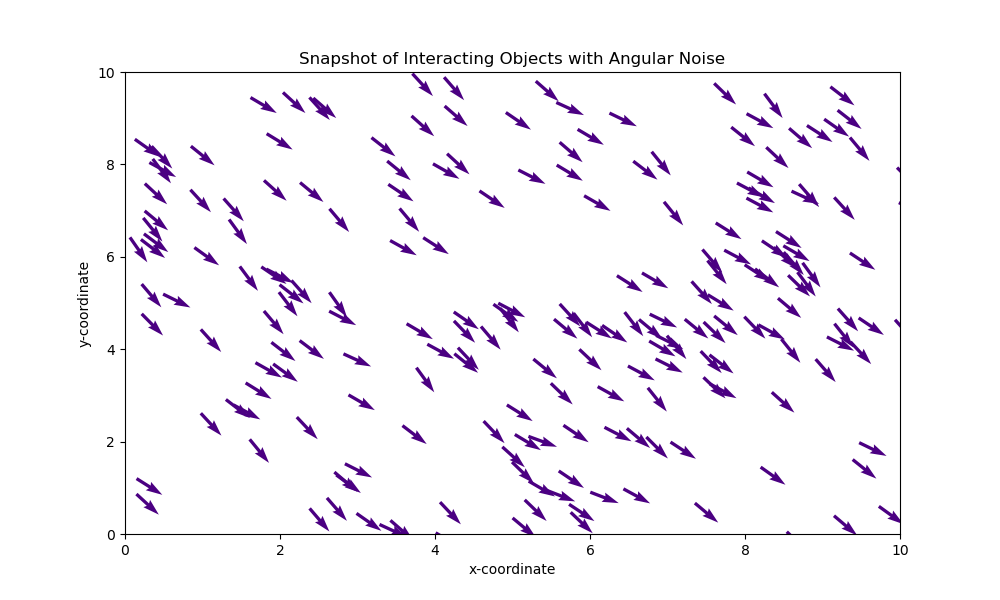

In [4]:
# 2 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm 

%matplotlib ipympl
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

# initialize the state of the system with random positions and orientations
def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        # calculate the average orientation of neighbors using formula provided in the manuscript
        if np.any(neighbors):  # if there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # if no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

# evolve the system with interactions
def evolve_system_with_interactions(positions, orientations, L, r0, eta, delta_t, time_steps):
    for _ in range(time_steps):
        # aligning orientations with neighbors
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        
        # updating positions based on orientations
        positions[:, 0] = (positions[:, 0] + np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + np.sin(orientations) * delta_t) % L
    
    return positions, orientations

def get_orientation_color(orientations, cmap='hsv'): 
    # generates color based on orientations
    # normalize the orientations between 0 and 1 for the colormap
    normalized_orientations = (orientations - np.min(orientations)) / (np.max(orientations) - np.min(orientations))
    # get the corresponding colormap
    colors = cm.get_cmap(cmap)(normalized_orientations)
    return colors

# parameters
L = 10
N = 200
r0 = 2  # interaction radius
eta = 0.5  # angular noise
delta_t = 1
time_steps = 250  # number of time steps to evolve the system

# initialize and evolve the system
positions, orientations = initialize_system(N, L)
positions, orientations = evolve_system_with_interactions(positions, orientations, L, r0, eta, delta_t, time_steps)

colors = get_orientation_color(orientations)

# plotting a snapshot of the system
plt.figure(figsize=(10, 6))
plt.quiver(positions[:, 0], positions[:, 1], np.cos(orientations), np.sin(orientations), color='indigo')
plt.xlim(0, L)
plt.ylim(0, L)
plt.title('Snapshot of Interacting Objects with Angular Noise')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

<IPython.core.display.Javascript object>


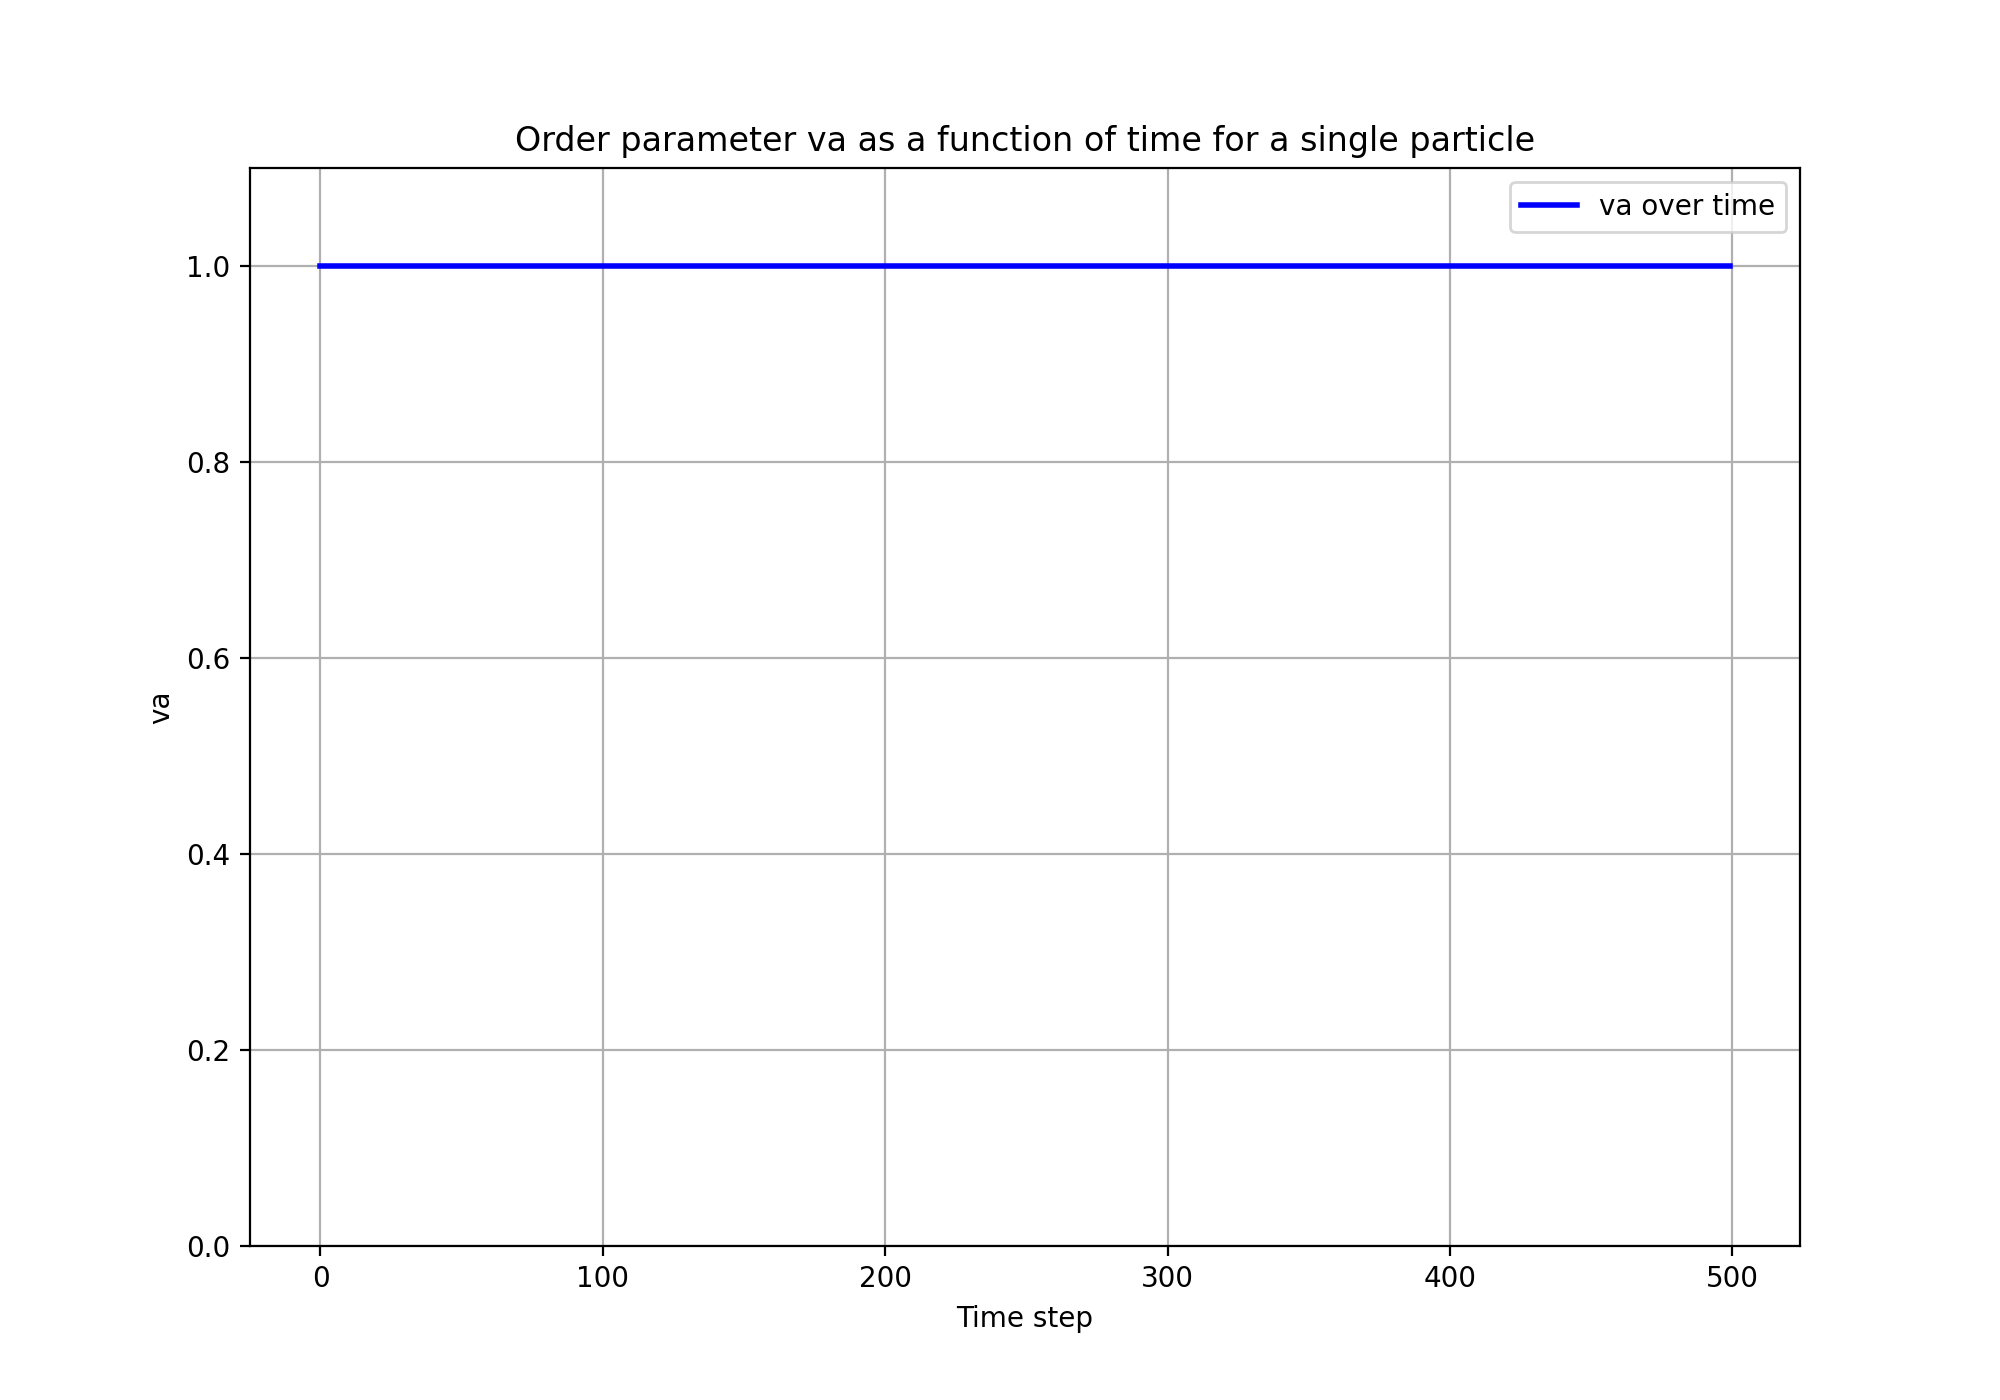

In [8]:
# 3 problems, #1

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the order parameter for a single particle
def order_parameter(velocity):
    # since there's only one particle, the order parameter is just the magnitude of the velocity
    # normalized by the speed
    return np.linalg.norm(velocity) / speed

# defining the speed and the constant orientation for the particle
speed = 1  # constant speed of the particle
orientation = 0  # constant orientation (direction) of the particle

# velocity vector from the speed and orientation
velocity = np.array([speed * np.cos(orientation), speed * np.sin(orientation)])

# order parameter, (constant in this case)
va = order_parameter(velocity)

# Number of time steps for the simulation
time_steps = 500

# creating a time array for plotting
time = np.arange(time_steps)

# plotting order parameter over time
plt.figure(figsize=(10, 7))
plt.plot(time, np.full(time.shape, va), label='va over time', color='blue', linewidth=2)
plt.title('Order parameter va as a function of time for a single particle')
plt.xlabel('Time step')
plt.ylabel('va')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()


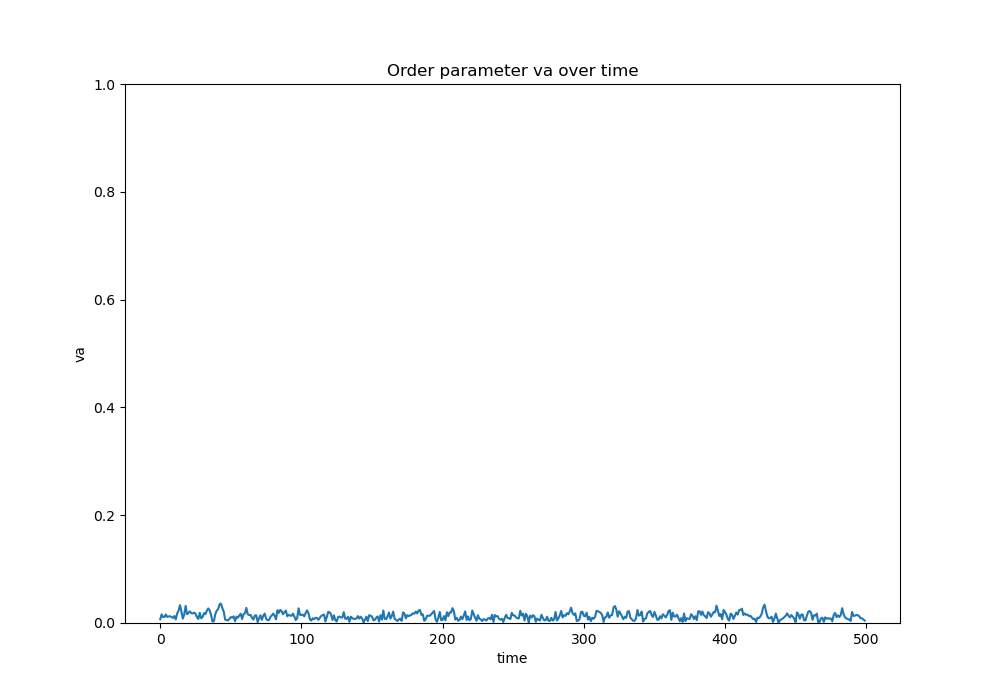

In [5]:
# 3 problems, #2

import numpy as np
import matplotlib.pyplot as plt

# parameters
N = 5000 
L = 25.0 
eta = 3.0 
n_steps = 500  # Corrected variable name here
speed = 1 

# randomly initialize orientations
orientations = np.random.uniform(-np.pi, np.pi, N)

# calculate the order parameter va
def order_parameter(orientations, N, speed):
    # components of the velocity vectors
    vx = np.cos(orientations)
    vy = np.sin(orientations)
    
    # sums of velocity vector
    vx_sum = np.sum(vx)
    vy_sum = np.sum(vy)
    
    # calc the magnitude of the sum of the velocity vectors and normalize by N*speed
    va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * speed)
    return va

# store the va values over time
va_values = np.zeros(n_steps)  # corrected variable name here

for t in range(n_steps):  # corrected variable name here
    # apply angular noise to orientation of each particle
    orientations += np.random.uniform(-eta/2, eta/2, N)
    
    # ensuring orientations remain between -pi and pi
    orientations = (orientations + np.pi) % (2 * np.pi) - np.pi
    
    # va for this time step
    va_values[t] = order_parameter(orientations, N, speed)
    
# plot the result
plt.figure(figsize=(10, 7))
plt.plot(va_values)
plt.xlabel('time')
plt.ylabel('va')
plt.ylim(0, 1)
plt.title('Order parameter va over time')
plt.show()

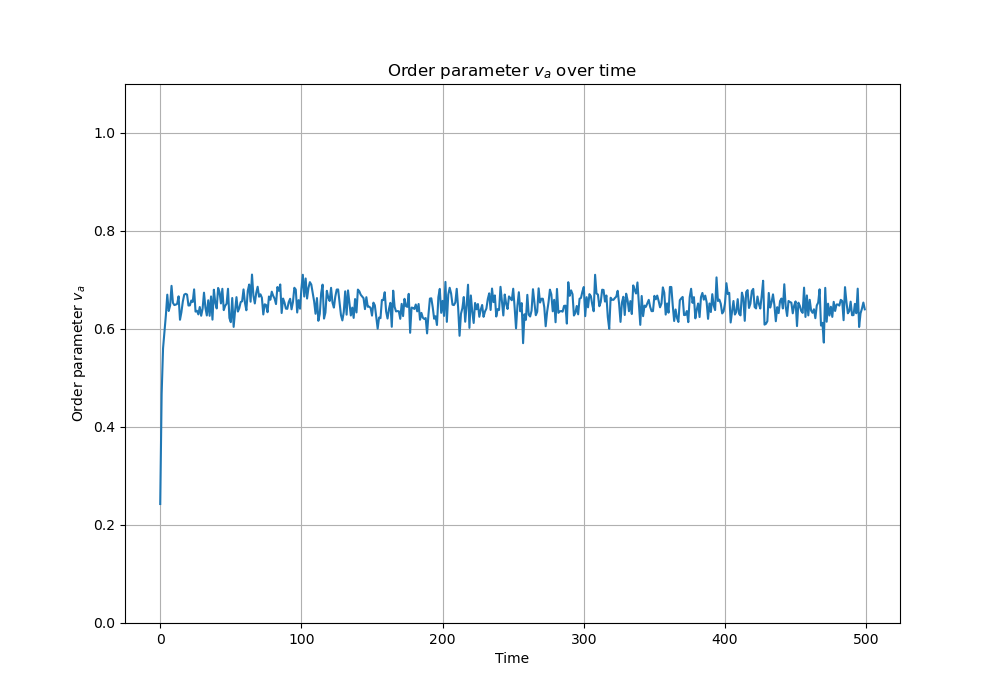

In [6]:
# 3 problems, #3

import numpy as np
import matplotlib.pyplot as plt
import math

# parameters:
L = 5
N = 200
r0 = 1  # interaction radius
eta = 3  # angular noise
delta_t = 1
time_steps = 500  # number of time steps to evolve system
v = 1

def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        if np.any(neighbors):
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

def evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps):
    va_values = []
    
    for _ in range(time_steps):
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L
        
        # calculate order parameter (va) at each time step
        vx = np.cos(orientations)
        vy = np.sin(orientations)
        vx_sum = np.sum(vx)
        vy_sum = np.sum(vy)
        va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * v)
        va_values.append(va)
    
    return positions, orientations, va_values


# initialize and evolve system
positions, orientations = initialize_system(N, L)
positions, orientations, va_values = evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps)

# plot va as a function of time
plt.figure(figsize=(10, 7))
plt.plot(va_values)
plt.xlabel('Time')
plt.ylabel('Order parameter $v_a$')
plt.ylim(0, 1.1)
plt.title('Order parameter $v_a$ over time')
plt.grid(True)
plt.show()

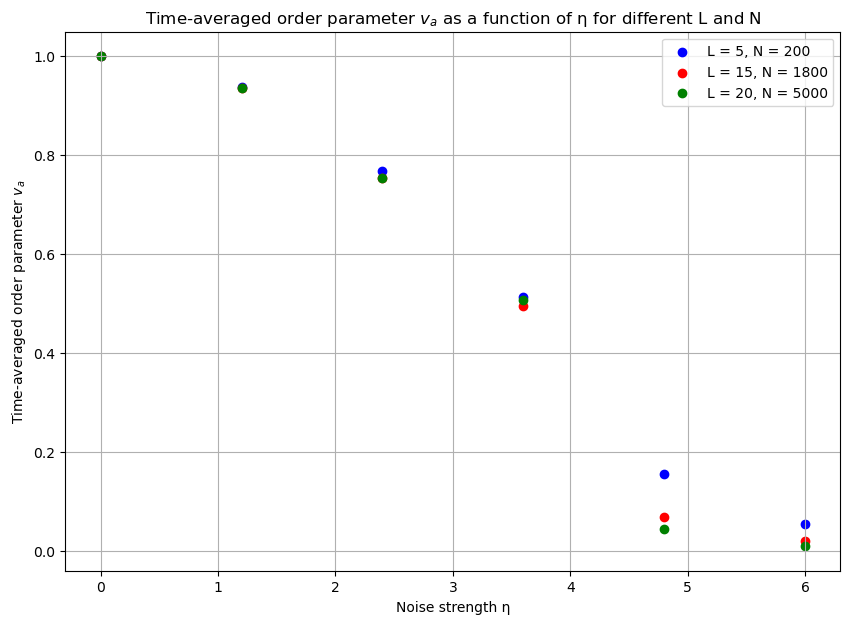

In [3]:
# 3 problems, #4

import numpy as np
import matplotlib.pyplot as plt
import math

# Define the simulation function
def simulate_system(v, N, L, r0, eta_values, delta_t, time_steps, steady_state_time):
    def initialize_system(N, L):
        positions = np.random.uniform(0, L, (N, 2))
        orientations = np.random.uniform(-np.pi, np.pi, N)
        return positions, orientations

    def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
        N = len(positions)
        new_orientations = np.copy(orientations)

        for i in range(N):
            dx = positions[:, 0] - positions[i, 0]
            dy = positions[:, 1] - positions[i, 1]
            dx = dx - L * np.round(dx / L)
            dy = dy - L * np.round(dy / L)
            distances = np.sqrt(dx**2 + dy**2)
            neighbors = (distances < r0) & (distances > 0)  # exclude self

            if np.any(neighbors):
                average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                                 np.cos(orientations[neighbors]).mean())
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta/2, eta/2)

        return new_orientations

    average_vas = []

    for eta in eta_values:
        positions, orientations = initialize_system(N, L)
        va_values = []

        for _ in range(time_steps):
            orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
            positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
            positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L

            vx = np.cos(orientations)
            vy = np.sin(orientations)
            vx_sum = np.sum(vx)
            vy_sum = np.sum(vy)
            va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * v)
            va_values.append(va)

        average_va = np.median(va_values[-steady_state_time:])
        average_vas.append(average_va)

    return eta_values, average_vas

# Parameters
parameters = [
    {"L": 5, "N": 200, "color": "blue"},
    {"L": 15, "N": 1800, "color": "red"},
    {"L": 20, "N": 5000, "color": "green"}
]

r0 = 1
delta_t = 1
v = 1
time_steps = 500
steady_state_time = 100  # time after which the system reaches steady state
eta_values = np.linspace(0, 6, 6)  # generate 6 values of η between 0 and 6

# Plotting
plt.figure(figsize=(10, 7))
for param in parameters:
    eta_values, average_vas = simulate_system(v, param["N"], param["L"], r0, eta_values, delta_t, time_steps, steady_state_time)
    plt.scatter(eta_values, average_vas, color=param["color"], label=f'L = {param["L"]}, N = {param["N"]}')

plt.xlabel('Noise strength η')
plt.ylabel('Time-averaged order parameter $v_a$')
plt.title('Time-averaged order parameter $v_a$ as a function of η for different L and N')
plt.legend()
plt.grid(True)
plt.show()


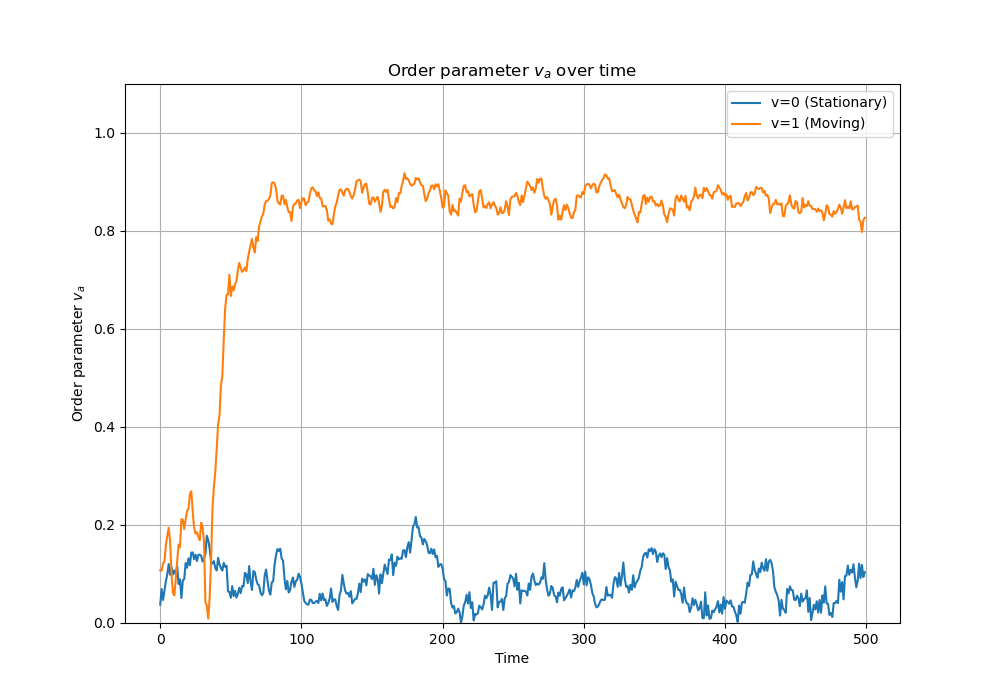

In [2]:
#3.6

import numpy as np
import matplotlib.pyplot as plt

# parameters:
L = 20
N = 200
r0 = 1  # interaction radius
eta = 1  # angular noise
delta_t = 1
time_steps = 500  # number of time steps to evolve system

# Function to initialize the system with positions and orientations
def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

# Function to align orientation with neighbors considering periodic boundary conditions
def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        if np.any(neighbors):
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

# Function to evolve the system with interactions and calculate the order parameter
def evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps):
    va_values = []
    
    for _ in range(time_steps):
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L
        # calc va at each time step using complex exponential form
        order_param = np.sum(np.exp(1j * orientations)) / N
        va = np.abs(order_param)
        va_values.append(va)
    
    return va_values

# Initialize systems
positions_v0, orientations_v0 = initialize_system(N, L)
positions_v1, orientations_v1 = initialize_system(N, L)

# Evolve systems and calculate order par+ameters
va_values_v0 = evolve_system_with_interactions(0, positions_v0, orientations_v0, L, r0, eta, delta_t, time_steps)
va_values_v1 = evolve_system_with_interactions(1, positions_v1, orientations_v1, L, r0, eta, delta_t, time_steps)

# Plot va as a function of time for both stationary and moving particles
plt.figure(figsize=(10, 7))
plt.plot(va_values_v0, label='v=0 (Stationary)')
plt.plot(va_values_v1, label='v=1 (Moving)')
plt.xlabel('Time')
plt.ylabel('Order parameter $v_a$')
plt.ylim(0, 1.1)
plt.title('Order parameter $v_a$ over time')
plt.legend()
plt.grid(True)
plt.show()

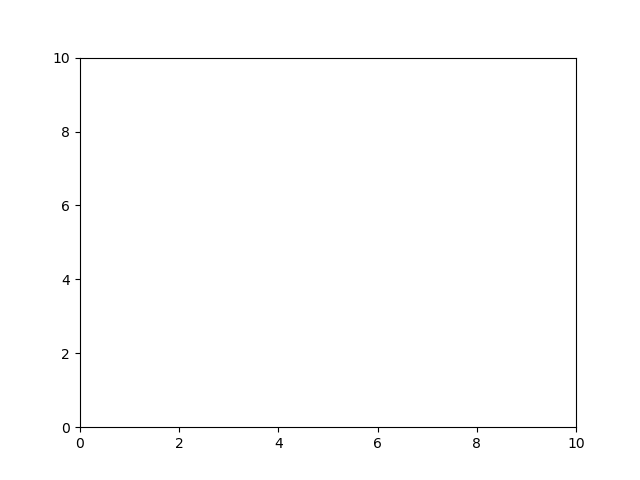

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 20
N_prey = 180
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        angle_diffs = np.abs(angles_to_prey - orientations_predator[i]) % (2 * np.pi)
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # Update predator orientations to chase prey
    orientations_predators = update_predator_orientation(positions_predators, positions_prey, orientations_predators, vision_angle_predator, r0_predator)
    
    # Simulate prey evasion and random movement (simplified)
    orientations_prey += np.random.uniform(-eta_prey, eta_prey, N_prey)
    
    # Update positions
    positions_predators = update_orientation_and_position(positions_predators, orientations_predators, np.full(N_predators, speed_predator), L)
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    # Update vision cones
    # Remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()

    # Draw new wedges
    for pos, orientation in zip(positions_predators, orientations_predators):
        start_angle = np.degrees(orientation - vision_angle_predator / 2)
        end_angle = np.degrees(orientation + vision_angle_predator / 2)
        wedge = Wedge(pos, r0_predator, start_angle, end_angle, color='r', alpha=0.2)
        ax.add_patch(wedge)
        vision_cones.append(wedge)
    
    return predators, prey,

ani = FuncAnimation(fig, animate, init_func=init, blit=True, interval=100, frames=200)

plt.show()

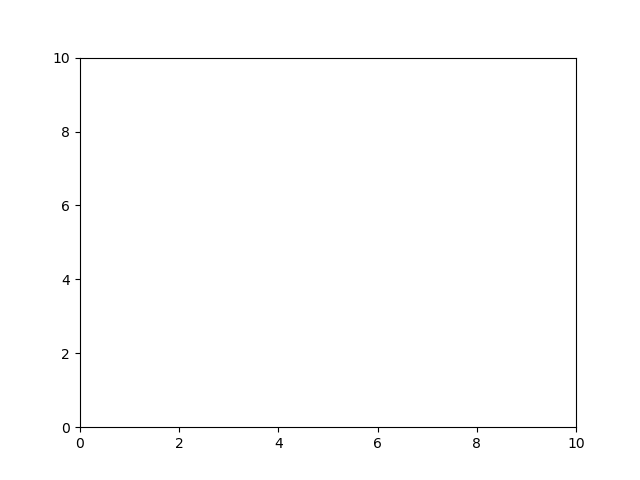

In [2]:
#One predator, Vicsek flocking

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # Find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self
        
        # Calculate the average orientation of neighbors
        if np.any(neighbors):  # If there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # If no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
    
    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        angle_diffs = np.abs(angles_to_prey - orientations_predator[i]) % (2 * np.pi)
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # First, update predator orientations to chase the nearest prey
    orientations_predators = update_predator_orientation(positions_predators, positions_prey, orientations_predators, vision_angle_predator, r0_predator)
    
    # Then, update predator positions based on their new orientations
    positions_predators = update_orientation_and_position(positions_predators, orientations_predators, np.full(N_predators, speed_predator), L)
    
    # Align prey orientations with their neighbors following the Vicsek model
    orientations_prey = align_orientation_with_neighbors(positions_prey, orientations_prey, L, r0_prey, eta_prey)
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Update plots
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    
    # Update vision cones
    # Clear old wedges from the axes
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()

    # Draw new wedges for predator's field of vision
    for pos, orientation in zip(positions_predators, orientations_predators):
        start_angle = np.degrees(orientation - vision_angle_predator / 2)
        end_angle = np.degrees(orientation + vision_angle_predator / 2)
        wedge = Wedge(pos, r0_predator, start_angle, end_angle, color='r', alpha=0.2)
        ax.add_patch(wedge)
        vision_cones.append(wedge)
    
    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=True)
plt.show()


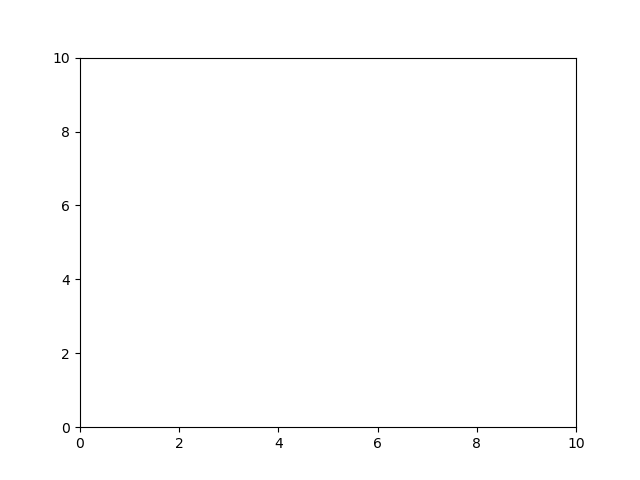

In [3]:
#One predator, Vicsek flock (better flocking!) Now with marked currently pursued prey 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # Find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self
        
        # Calculate the average orientation of neighbors
        if np.any(neighbors):  # If there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # If no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
    
    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        angle_diffs = np.abs(angles_to_prey - orientations_predator[i]) % (2 * np.pi)
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # First, update predator orientations to chase the nearest prey
    orientations_predators = update_predator_orientation(positions_predators, positions_prey, orientations_predators, vision_angle_predator, r0_predator)
    
    # Then, update predator positions based on their new orientations
    positions_predators = update_orientation_and_position(positions_predators, orientations_predators, np.full(N_predators, speed_predator), L)
    
    # Align prey orientations with their neighbors following the Vicsek model
    orientations_prey = align_orientation_with_neighbors(positions_prey, orientations_prey, L, r0_prey, eta_prey)
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Clear the previous frame's drawings
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # Plot all prey
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    
    # Identify and plot the prey being chased with a different color
    if len(orientations_predators) > 0:  # Check if there is at least one predator
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]  # Assuming there is only one predator (for simplicity)
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Determine the angle differences within the vision cone
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        # Filter for prey that is both in vision and within the interaction radius
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
    # Now, find the nearest prey within the vision cone
    if np.any(prey_in_vision_and_range):
        # Get indices of prey that are in vision and range, then find the nearest one
        prey_indices = np.where(prey_in_vision_and_range)[0]
        nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
        chased_prey_position = positions_prey[nearest_prey_index]
        
        # Highlight the chased prey
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    
    # Plot the predator
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    # Update vision cones
    vision_cones.clear()  # Clear old vision cones
    for pos, orientation in zip(positions_predators, orientations_predators):
        start_angle = np.degrees(orientation - vision_angle_predator / 2)
        end_angle = np.degrees(orientation + vision_angle_predator / 2)
        wedge = Wedge(pos, r0_predator, start_angle, end_angle, color='red', alpha=0.2)
        ax.add_patch(wedge)
        vision_cones.append(wedge)
    
    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()

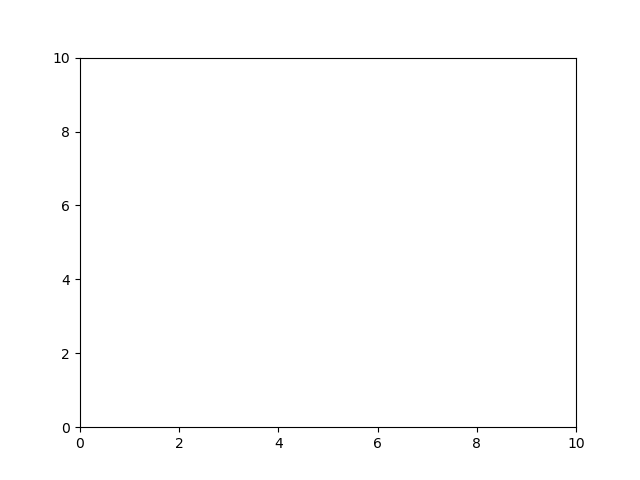

In [1]:
# Adjusting wedge function for crossing bounds, added periodic boundary checking for marked prey (now the marked prey is correctly shown across a border)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.1  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # Find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self
        
        # Calculate the average orientation of neighbors
        if np.any(neighbors):  # If there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # If no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
    
    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator


def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    # Create the main vision cone
    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    # Function to add extra wedge if boundary crossed
    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    # Check for horizontal boundary crossing
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    # Check for vertical boundary crossing
    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones


# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # First, update predator orientations to chase the nearest prey
    orientations_predators = update_predator_orientation(
        positions_predators, positions_prey, orientations_predators,
        vision_angle_predator, r0_predator, L
    )
    
    # Then, update predator positions based on their new orientations
    positions_predators = update_orientation_and_position(
        positions_predators, orientations_predators, 
        np.full(N_predators, speed_predator), L
    )
    
    # Align prey orientations with their neighbors following the Vicsek model
    orientations_prey = align_orientation_with_neighbors(positions_prey, orientations_prey, L, r0_prey, eta_prey)
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Clear the previous frame's drawings
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # Plot all prey
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    
    # Identify and color the prey being chased different color
    if len(orientations_predators) > 0:  # Check if there is at least one predator
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]  # Assuming there is only one predator (for simplicity)
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Determine the angle differences within the vision cone
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        # Filter for prey that is both in vision and within the interaction radius
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
    # Now, find the nearest prey within the vision cone
    if np.any(prey_in_vision_and_range):
        # Get indices of prey that are in vision and range, then find the nearest one
        prey_indices = np.where(prey_in_vision_and_range)[0]
        nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
        chased_prey_position = positions_prey[nearest_prey_index]
        
        # Highlight the chased prey
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    
    # Plot the predator
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    # Update vision cones
    vision_cones.clear()  # Clear old vision cones
    for pos, orientation in zip(positions_predators, orientations_predators):
        cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
        for cone in cones:
            ax.add_patch(cone)
            vision_cones.append(cone)
    
    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()

In [2]:
# testing that predator correctly identifies the closest prey across a boundary
import numpy as np
import matplotlib.pyplot as plt

L = 10 
r0_predator = 1.5  # Predator interaction radius
vision_angle_predator = np.pi / 2

# Scenario where the prey is across the boundary from the predator
positions_predators = np.array([[9.5, 5]])  # Predator near the right boundary
positions_prey = np.array([[0.2, 5.1], [5, 6], [7.6, 5]])  # Prey across the boundary, and other prey

# Assume predator orientation towards the right, so it should see across the boundary 
orientations_predators = np.array([0])

# Function to calculate if prey is in vision and within radius (copied from cell above)
def test_prey_detection(positions_predators, positions_prey, orientations_predators, L, r0_predator, vision_angle_predator):
    predator = positions_predators[0]
    predator_orientation = orientations_predators[0]
    
    vectors_to_prey = positions_prey - predator
    vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
    vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2

    distances = np.linalg.norm(vectors_to_prey, axis=1)
    angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])

    angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
    in_vision = (angle_diffs < vision_angle_predator / 2)
    prey_in_vision_and_range = in_vision & (distances < r0_predator)

    if np.any(prey_in_vision_and_range):
        prey_indices = np.where(prey_in_vision_and_range)[0]
        nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
        chased_prey_position = positions_prey[nearest_prey_index]
        print("Nearest Prey Detected at:", chased_prey_position)
    else:
        print("No Prey Detected")

test_prey_detection(positions_predators, positions_prey, orientations_predators, L, r0_predator, vision_angle_predator)


Nearest Prey Detected at: [0.2 5.1]


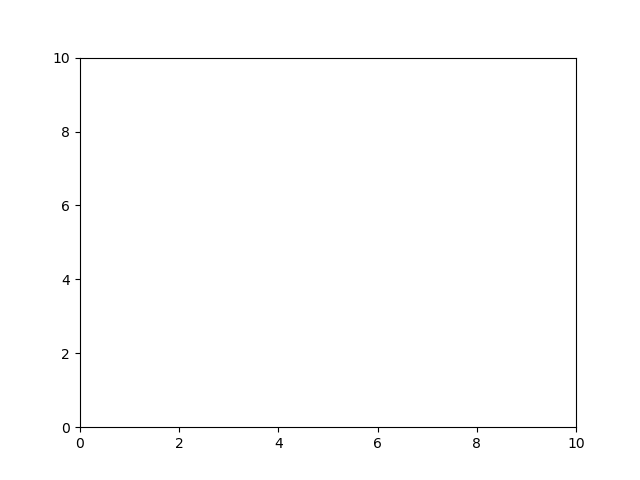

In [1]:
# Implementing Prey Evasion (moves to nearest neighbor)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations



def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator


def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    # Create the main vision cone
    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    # Function to add extra wedge if boundary crossed
    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    # Check for horizontal boundary crossing
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    # Check for vertical boundary crossing
    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones


# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    orientations_predators = update_predator_orientation(
        positions_predators, positions_prey, orientations_predators, 
        vision_angle_predator, r0_predator, L
    )
    positions_predators = update_orientation_and_position(
        positions_predators, orientations_predators, 
        np.full(N_predators, speed_predator), L
    )

    # Clear the previous frame's drawings
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # Check if there is at least one predator
    if len(orientations_predators) > 0:
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]
        
        # Calculate vectors to all prey and adjust for periodic boundaries
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Determine angle differences within the vision cone
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        # Filter for prey in vision and within interaction radius
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
        # Find the nearest prey within the vision cone
        if np.any(prey_in_vision_and_range):
            prey_indices = np.where(prey_in_vision_and_range)[0]
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
        else:
            nearest_prey_index = None
    else:
        nearest_prey_index = None
    
    # Update prey orientations with potential evasion behavior
    orientations_prey = align_orientation_with_neighbors(
        positions_prey, orientations_prey, L, r0_prey, eta_prey, 
        positions_predators[0], nearest_prey_index
    )
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Plot all prey and mark the chased prey if identified
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    if nearest_prey_index is not None:
        chased_prey_position = positions_prey[nearest_prey_index]
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    # Plot the predator
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    # Update vision cones
    vision_cones.clear()
    for pos, orientation in zip(positions_predators, orientations_predators):
        cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
        for cone in cones:
            ax.add_patch(cone)
            vision_cones.append(cone)
    
    return predators, prey, *vision_cones


ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()

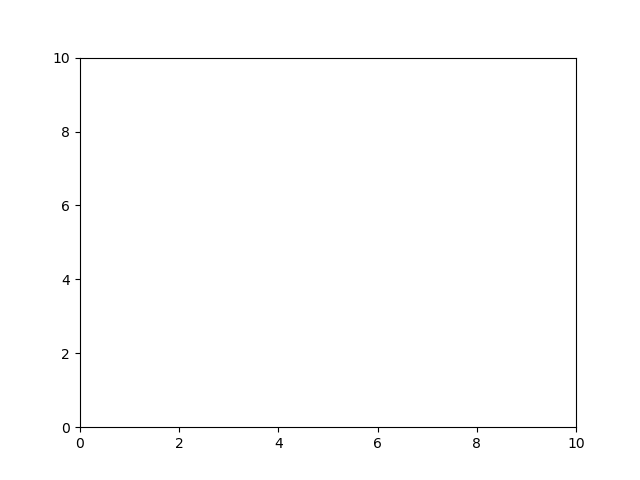

In [1]:
# incorporating capture of prey

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03
clear_interval_frames = 150
frame_count = 0

captured_prey_indices = []

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations



def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    capture_distance = 0.1 * r0  # 10% of the interaction radius
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        # Capture logic
        for idx in prey_indices:
            if distances[idx] < capture_distance and idx not in captured_prey_indices:
                captured_prey_indices.append(idx)

        # Filter out captured prey
        active_prey_indices = [idx for idx in prey_indices if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator


def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    # Create the main vision cone
    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    # Function to add extra wedge if boundary crossed
    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    # Check for horizontal boundary crossing
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    # Check for vertical boundary crossing
    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones


# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, captured_prey_indices
    
    orientations_predators = update_predator_orientation(
        positions_predators, positions_prey, orientations_predators, 
        vision_angle_predator, r0_predator, L, captured_prey_indices
    )
    positions_predators = update_orientation_and_position(
        positions_predators, orientations_predators, 
        np.full(N_predators, speed_predator), L
    )

    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    if len(orientations_predators) > 0:
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]
        
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
        active_prey_indices = [idx for idx in np.where(prey_in_vision_and_range)[0] if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
        else:
            nearest_prey_index = None
    else:
        nearest_prey_index = None
    
    orientations_prey = align_orientation_with_neighbors(
        positions_prey, orientations_prey, L, r0_prey, eta_prey, 
        positions_predators[0], nearest_prey_index
    )
    
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    if nearest_prey_index is not None:
        chased_prey_position = positions_prey[nearest_prey_index]
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    for idx in captured_prey_indices:
        ax.scatter(positions_prey[idx, 0], positions_prey[idx, 1], color='green', s=50, zorder=3)  # Mark captured prey

    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    vision_cones.clear()
    for pos, orientation in zip(positions_predators, orientations_predators):
        cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
        for cone in cones:
            ax.add_patch(cone)
            vision_cones.append(cone)

    # frame_count += 1
    # if frame_count % clear_interval_frames == 0:
    #     captured_prey_indices.clear()
    
    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()

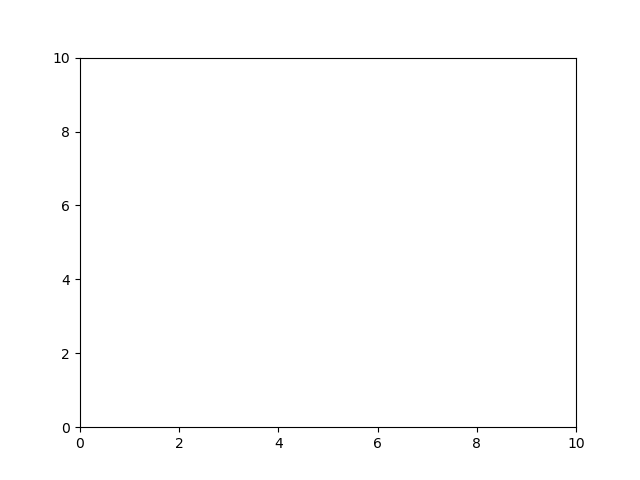

In [1]:
# Correctly removing prey from captured prey dictionary after specified time period

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03
capture_duration = 15  # Duration for which a prey remains captured (seconds)

captured_prey_indices = {}  # Dictionary to keep track of captured prey and their capture times

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    capture_distance = 0.1 * r0  # 10% of the interaction radius
    current_time = time.time()
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        for idx in prey_indices:
            if distances[idx] < capture_distance and idx not in captured_prey_indices:
                captured_prey_indices[idx] = current_time
        
        active_prey_indices = [idx for idx in prey_indices if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones

positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, captured_prey_indices

    # Update predator orientation
    orientations_predators = update_predator_orientation(
        positions_predators, positions_prey, orientations_predators, 
        vision_angle_predator, r0_predator, L, captured_prey_indices
    )
    # Update predator position
    positions_predators = update_orientation_and_position(
        positions_predators, orientations_predators, 
        np.full(N_predators, speed_predator), L
    )

    # Clear the previous frame's drawings
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # Check if there is at least one predator
    if len(orientations_predators) > 0:
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]
        
        # Calculate vectors to all prey and adjust for periodic boundaries
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Determine angle differences within the vision cone
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        # Filter for prey in vision and within interaction radius
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
        active_prey_indices = [idx for idx in np.where(prey_in_vision_and_range)[0] if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
        else:
            nearest_prey_index = None
    else:
        nearest_prey_index = None
    
    # Update prey orientations with potential evasion behavior
    orientations_prey = align_orientation_with_neighbors(
        positions_prey, orientations_prey, L, r0_prey, eta_prey, 
        positions_predators[0], nearest_prey_index
    )
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Plot all prey and mark the chased prey if identified
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    if nearest_prey_index is not None:
        chased_prey_position = positions_prey[nearest_prey_index]
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    # Plot captured prey
    current_time = time.time()
    to_remove = []
    for idx, capture_time in captured_prey_indices.items():
        if current_time - capture_time > capture_duration:
            to_remove.append(idx)
        else:
            ax.scatter(positions_prey[idx, 0], positions_prey[idx, 1], color='green', s=50, zorder=3)  # Mark captured prey

    # Remove prey from captured list after capture_duration
    for idx in to_remove:
        del captured_prey_indices[idx]

    # Plot the predator
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    # Update vision cones
    vision_cones.clear()
    for pos, orientation in zip(positions_predators, orientations_predators):
        cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
        for cone in cones:
            ax.add_patch(cone)
            vision_cones.append(cone)

    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()


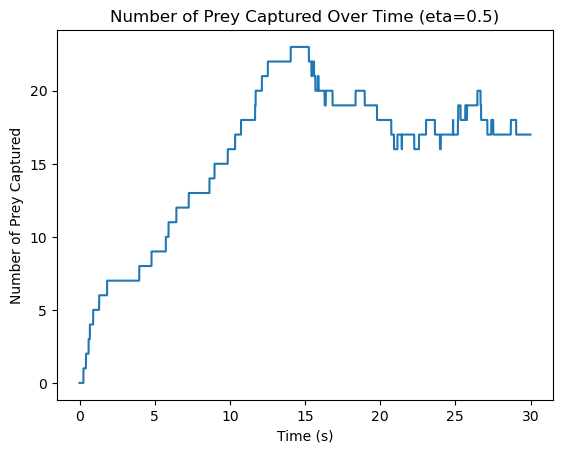

In [4]:
#Plotting number of prey captured vs different eta

import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 5  # Adjust eta_prey as needed
delta_t = 0.1
speed_predator = 0.05
speed_prey = 0.03
total_simulation_time = 30  # Total simulation time in seconds

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        prey_indices = [index for index in prey_indices if index not in captured_prey_indices]
        
        if prey_indices:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
            
            # Check if prey is captured
            if distances[nearest_prey_index] < 0.1 * r0:
                captured_prey_indices.append(nearest_prey_index)
                capture_times[nearest_prey_index] = time.time()
    return orientations_predator

def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    # Create the main vision cone
    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    # Function to add extra wedge if boundary crossed
    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    # Check for horizontal boundary crossing
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    # Check for vertical boundary crossing
    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones

def run_simulation(eta_prey):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, capture_times
    
    captured_prey_indices = []
    capture_times = {}
    captured_counts = []
    
    start_time = time.time()
    current_time = start_time
    time_stamps = []

    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    
    while current_time - start_time < total_simulation_time:
        orientations_predators = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        # Remove captured prey from captured_prey_indices after 15 seconds
        for prey_index in list(captured_prey_indices):
            if time.time() - capture_times[prey_index] > 15:
                captured_prey_indices.remove(prey_index)
        
        captured_counts.append(len(captured_prey_indices))
        time_stamps.append(current_time - start_time)
        
        current_time = time.time()
    
    return captured_counts, time_stamps

# Run simulation and plot results for a single eta_prey value
eta_prey = 0.5  # Change this value to test different noise levels
captured_counts, time_stamps = run_simulation(eta_prey)

plt.figure()
plt.plot(time_stamps, captured_counts)
plt.xlabel("Time (s)")
plt.ylabel("Number of Prey Captured")
plt.title(f"Number of Prey Captured Over Time (eta={eta_prey})")
plt.show()


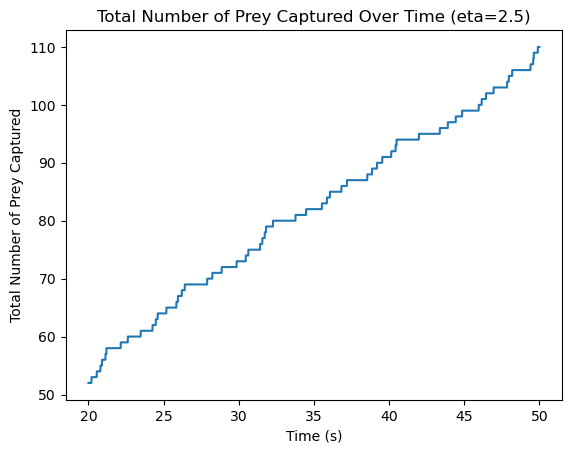

In [23]:
#Plotting number of prey captured vs different eta

import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 2.5  # Adjust eta_prey as needed
delta_t = 0.1
speed_predator = 0.05
speed_prey = 0.03
initial_simulation_time = 20  # Initial simulation time in seconds
data_collection_time = 30  # Data collection time in seconds
capture_time_threshold = 15  # Time after which captured prey is released

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_dict, captured_count):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        prey_indices = [index for index in prey_indices if index not in captured_prey_dict]
        
        if prey_indices:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
            
            # Check if prey is captured
            if distances[nearest_prey_index] < 0.1 * r0:
                captured_prey_dict[nearest_prey_index] = time.time()
                captured_count += 1
    return orientations_predator, captured_count

def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    # Create the main vision cone
    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    # Function to add extra wedge if boundary crossed
    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    # Check for horizontal boundary crossing
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    # Check for vertical boundary crossing
    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones

def run_simulation(eta_prey):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, capture_times
    
    captured_prey_dict = {}
    captured_count = 0
    captured_counts = []
    time_stamps = []
    
    start_time = time.time()
    current_time = start_time

    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    
    # Initial simulation run for 20 seconds
    while current_time - start_time < initial_simulation_time:
        orientations_predators, captured_count = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_dict, captured_count
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        # Remove captured prey from captured_prey_dict after 15 seconds
        for prey_index in list(captured_prey_dict):
            if time.time() - captured_prey_dict[prey_index] > capture_time_threshold:
                del captured_prey_dict[prey_index]
        
        current_time = time.time()
    
    # Start collecting data for 30 seconds after initial simulation
    start_data_collection_time = current_time
    while current_time - start_data_collection_time < data_collection_time:
        orientations_predators, captured_count = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_dict, captured_count
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        # Remove captured prey from captured_prey_dict after 15 seconds
        for prey_index in list(captured_prey_dict):
            if time.time() - captured_prey_dict[prey_index] > capture_time_threshold:
                del captured_prey_dict[prey_index]
        
        captured_counts.append(captured_count)
        time_stamps.append(current_time - start_time)
        
        current_time = time.time()
    
    return captured_count, captured_counts, time_stamps

# Run simulation and plot results for a single eta_prey value
eta_prey = 2.5  # Change this value to test different noise levels
captured_count, captured_counts, time_stamps = run_simulation(eta_prey)

# Plot the final value of captured_count
plt.figure()
plt.plot(time_stamps, captured_counts)
plt.xlabel("Time (s)")
plt.ylabel("Total Number of Prey Captured")
plt.title(f"Total Number of Prey Captured Over Time (eta={eta_prey})")
plt.show()


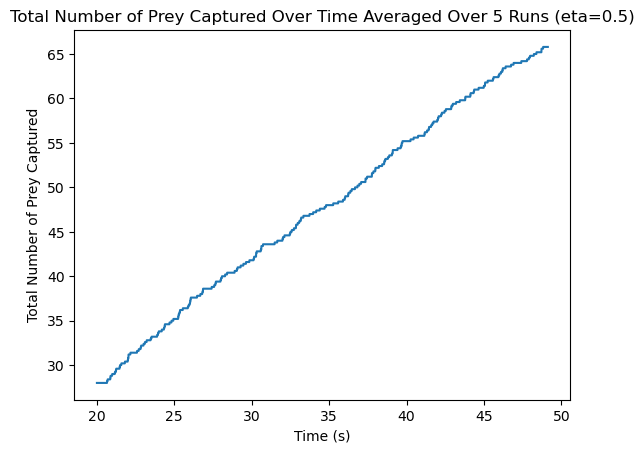

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
delta_t = 0.1
speed_predator = 0.05
speed_prey = 0.03
initial_simulation_time = 20  # Initial simulation time in seconds (no data collection)
data_collection_time = 30  # Data collection time in seconds

# Initialize capture_times and captured_count globally
capture_times = {}
captured_count = 0

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    global captured_count
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        prey_indices = [index for index in prey_indices if index not in captured_prey_indices]
        
        if prey_indices:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
            
            # Check if prey is captured
            if distances[nearest_prey_index] < 0.1 * r0:
                captured_prey_indices.append(nearest_prey_index)
                capture_times[nearest_prey_index] = time.time()
                captured_count += 1  # Increment the captured count
    return orientations_predator

def run_simulation(eta_prey):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, capture_times, captured_count
    
    # Initialize the system before starting the simulation
    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    captured_prey_indices = []
    capture_times = {}
    captured_count = 0
    captured_counts = []
    
    start_time = time.time()
    current_time = start_time

    # Initial simulation (20 seconds)
    while current_time - start_time < initial_simulation_time:
        orientations_predators = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        current_time = time.time()

    # Start collecting data for 30 seconds after initial simulation
    start_data_collection_time = current_time
    time_stamps = []

    while current_time - start_data_collection_time < data_collection_time:
        orientations_predators = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        # Remove captured prey from captured_prey_indices after 15 seconds
        for prey_index in list(captured_prey_indices):
            if time.time() - capture_times[prey_index] > 15:
                captured_prey_indices.remove(prey_index)
        
        captured_counts.append(captured_count)
        time_stamps.append(current_time - start_data_collection_time + initial_simulation_time)
        
        current_time = time.time()
    
    return captured_counts, time_stamps

def run_multiple_simulations(eta_prey, num_runs):
    all_captured_counts = []
    all_time_stamps = []

    for _ in range(num_runs):
        captured_counts, time_stamps = run_simulation(eta_prey)
        all_captured_counts.append(captured_counts)
        all_time_stamps.append(time_stamps)

    # Make sure all captured_counts and time_stamps lists have the same length
    min_length = min(len(c) for c in all_captured_counts)
    all_captured_counts = [c[:min_length] for c in all_captured_counts]
    all_time_stamps = [t[:min_length] for t in all_time_stamps]

    # Average the results across all runs
    avg_captured_counts = np.mean(all_captured_counts, axis=0)
    avg_time_stamps = np.mean(all_time_stamps, axis=0)

    return avg_captured_counts, avg_time_stamps

# Run multiple simulations and plot the averaged results
eta_prey = 0.5  # Change this value to test different noise levels
num_runs = 5  # Number of simulation runs to average

avg_captured_counts, avg_time_stamps = run_multiple_simulations(eta_prey, num_runs)

# Plot the averaged results
plt.figure()
plt.plot(avg_time_stamps, avg_captured_counts)
plt.xlabel("Time (s)")
plt.ylabel("Total Number of Prey Captured")
plt.title(f"Total Number of Prey Captured Over Time Averaged Over 5 Runs (eta={eta_prey})")
plt.xticks(np.arange(20, 51, 5))
plt.show()


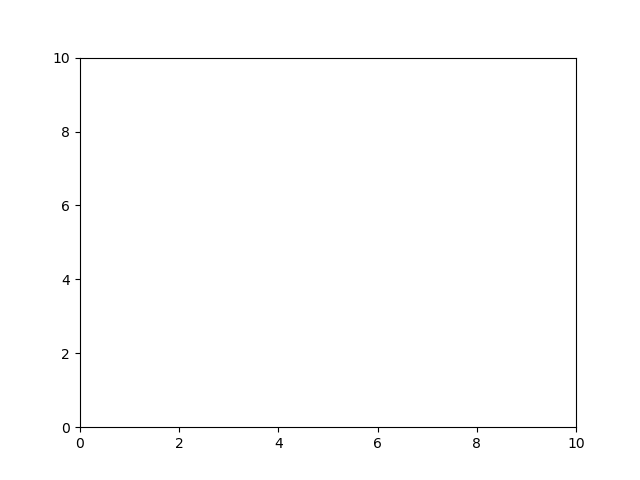

In [1]:
# Simulation where captured prey do not get removed from dictionary every 15 seconds

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 2  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

captured_prey_indices = {}  # Dictionary to keep track of captured prey and their capture times

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    capture_distance = 0.1 * r0  # 10% of the interaction radius
    current_time = time.time()
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        for idx in prey_indices:
            if distances[idx] < capture_distance and idx not in captured_prey_indices:
                captured_prey_indices[idx] = current_time
        
        active_prey_indices = [idx for idx in prey_indices if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones

positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, captured_prey_indices

    # Update predator orientation
    orientations_predators = update_predator_orientation(
        positions_predators, positions_prey, orientations_predators, 
        vision_angle_predator, r0_predator, L, captured_prey_indices
    )
    # Update predator position
    positions_predators = update_orientation_and_position(
        positions_predators, orientations_predators, 
        np.full(N_predators, speed_predator), L
    )

    # Clear the previous frame's drawings
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # Check if there is at least one predator
    if len(orientations_predators) > 0:
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]
        
        # Calculate vectors to all prey and adjust for periodic boundaries
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Determine angle differences within the vision cone
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        # Filter for prey in vision and within interaction radius
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
        active_prey_indices = [idx for idx in np.where(prey_in_vision_and_range)[0] if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
        else:
            nearest_prey_index = None
    else:
        nearest_prey_index = None
    
    # Update prey orientations with potential evasion behavior
    orientations_prey = align_orientation_with_neighbors(
        positions_prey, orientations_prey, L, r0_prey, eta_prey, 
        positions_predators[0], nearest_prey_index
    )
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Plot all prey and mark the chased prey if identified
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    if nearest_prey_index is not None:
        chased_prey_position = positions_prey[nearest_prey_index]
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    # Plot captured prey
    for idx in captured_prey_indices:
        ax.scatter(positions_prey[idx, 0], positions_prey[idx, 1], color='green', s=50, zorder=3)  # Mark captured prey

    # Plot the predator
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    # Update vision cones
    vision_cones.clear()
    for pos, orientation in zip(positions_predators, orientations_predators):
        cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
        for cone in cones:
            ax.add_patch(cone)
            vision_cones.append(cone)

    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()


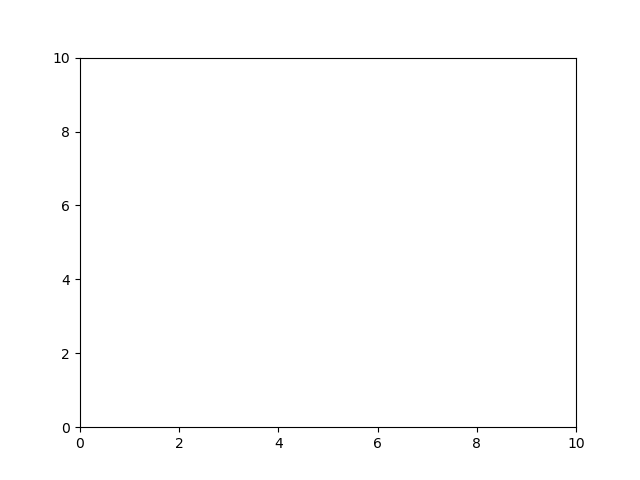

In [37]:
# no global variables, prey not getting removed from captured dict every 15 seconds (simulation gets slower over time)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge
import time

class PredatorPreySimulation:
    def __init__(self, L, N_predators, N_prey, r0_predator, r0_prey, vision_angle_predator, eta_prey, delta_t, speed_predator, speed_prey):
        self.L = L
        self.N_predators = N_predators
        self.N_prey = N_prey
        self.r0_predator = r0_predator
        self.r0_prey = r0_prey
        self.vision_angle_predator = vision_angle_predator
        self.eta_prey = eta_prey
        self.delta_t = delta_t
        self.speed_predator = speed_predator
        self.speed_prey = speed_prey
        self.captured_prey_indices = {}
        
        self.positions_predators, self.orientations_predators, self.positions_prey, self.orientations_prey = self.initialize_system()
        
    def initialize_system(self):
        positions_predators = np.random.uniform(0, self.L, (self.N_predators, 2))
        orientations_predators = np.random.uniform(-np.pi, np.pi, self.N_predators)
        positions_prey = np.random.uniform(0, self.L, (self.N_prey, 2))
        orientations_prey = np.random.uniform(-np.pi, np.pi, self.N_prey)
        return positions_predators, orientations_predators, positions_prey, orientations_prey

    def update_orientation_and_position(self, positions, orientations, speeds):
        dx = np.cos(orientations) * speeds * self.delta_t
        dy = np.sin(orientations) * speeds * self.delta_t
        positions[:, 0] += dx
        positions[:, 1] += dy
        positions[:, 0] = positions[:, 0] % self.L
        positions[:, 1] = positions[:, 1] % self.L
        return positions

    def align_orientation_with_neighbors(self, positions, orientations, predator_position, marked_prey_index=None):
        N = len(positions)
        new_orientations = np.copy(orientations)
        
        for i in range(N):
            dx = (positions[:, 0] - positions[i, 0] + self.L/2) % self.L - self.L/2
            dy = (positions[:, 1] - positions[i, 1] + self.L/2) % self.L - self.L/2
            distances = np.sqrt(dx**2 + dy**2)
            neighbors = (distances < self.r0_prey) & (distances > 0)  # Exclude self

            # Handling the predator
            predator_dx = (predator_position[0] - positions[i, 0] + self.L/2) % self.L - self.L/2
            predator_dy = (predator_position[1] - positions[i, 1] + self.L/2) % self.L - self.L/2
            predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
            
            if predator_distance < self.r0_prey:
                neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

            if i == marked_prey_index:
                if np.any(neighbors):
                    # Find the safest direction which is not towards the predator
                    safe_neighbors = neighbors.copy()
                    for j in np.where(neighbors)[0]:
                        if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < self.r0_prey:
                            safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                    if np.any(safe_neighbors):
                        nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                        target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                    else:
                        # If no safe neighbors, move directly away from the predator
                        target_orientation = np.arctan2(-predator_dy, -predator_dx)
                    
                    new_orientations[i] = target_orientation + np.random.uniform(-self.eta_prey/2, self.eta_prey/2)
                else:
                    new_orientations[i] += np.random.uniform(-self.eta_prey, self.eta_prey)
            else:
                # Standard behavior for other prey
                if np.any(neighbors):
                    average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                    new_orientations[i] = average_orientation + np.random.uniform(-self.eta_prey/2, self.eta_prey/2)
                else:
                    new_orientations[i] += np.random.uniform(-self.eta_prey, self.eta_prey)

        return new_orientations

    def update_predator_orientation(self):
        capture_distance = 0.1 * self.r0_predator  # 10% of the interaction radius
        current_time = time.time()
        for i, predator in enumerate(self.positions_predators):
            vectors_to_prey = self.positions_prey - predator
            # Adjust vectors for periodic boundary conditions
            vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + self.L / 2) % self.L - self.L / 2
            vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + self.L / 2) % self.L - self.L / 2
            
            distances = np.linalg.norm(vectors_to_prey, axis=1)
            angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
            
            angle_diffs = np.abs((angles_to_prey - self.orientations_predators[i] + np.pi) % (2 * np.pi) - np.pi)
            in_vision = (angle_diffs < self.vision_angle_predator / 2) | (angle_diffs > 2 * np.pi - self.vision_angle_predator / 2)
            in_range = distances < self.r0_predator
            
            prey_indices = np.where(in_vision & in_range)[0]
            for idx in prey_indices:
                if distances[idx] < capture_distance and idx not in self.captured_prey_indices:
                    self.captured_prey_indices[idx] = current_time
            
            active_prey_indices = [idx for idx in prey_indices if idx not in self.captured_prey_indices]
            if active_prey_indices:
                nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
                vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
                self.orientations_predators[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
        return self.orientations_predators

    def adjust_vision_cone(self, pos, orientation):
        start_angle = np.degrees(orientation - self.vision_angle_predator / 2)
        end_angle = np.degrees(orientation + self.vision_angle_predator / 2)
        cones = []

        main_cone = Wedge(pos, self.r0_predator, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(main_cone)

        def add_extra_wedge(x_offset, y_offset):
            extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
            extra_cone = Wedge(extra_pos, self.r0_predator, start_angle, end_angle, color='red', alpha=0.2)
            cones.append(extra_cone)

        if pos[0] + self.r0_predator * np.cos(orientation + self.vision_angle_predator / 2) > self.L or pos[0] + self.r0_predator * np.cos(orientation - self.vision_angle_predator / 2) > self.L:
            add_extra_wedge(-self.L, 0)
        if pos[0] + self.r0_predator * np.cos(orientation + self.vision_angle_predator / 2) < 0 or pos[0] + self.r0_predator * np.cos(orientation - self.vision_angle_predator / 2) < 0:
            add_extra_wedge(self.L, 0)

        vertical_check_angles = [orientation - self.vision_angle_predator / 2, orientation + self.vision_angle_predator / 2]
        for angle in vertical_check_angles:
            if pos[1] + self.r0_predator * np.sin(angle) > self.L:
                add_extra_wedge(0, -self.L)
            if pos[1] + self.r0_predator * np.sin(angle) < 0:
                add_extra_wedge(0, self.L)

        return cones

    def init(self):
        self.predators.set_data([], [])
        self.prey.set_data([], [])
        self.vision_cones.clear()
        return self.predators, self.prey,

    def animate(self, i):
        self.orientations_predators = self.update_predator_orientation()
        self.positions_predators = self.update_orientation_and_position(self.positions_predators, self.orientations_predators, np.full(self.N_predators, self.speed_predator))

        self.ax.clear()
        self.ax.set_xlim(0, self.L)
        self.ax.set_ylim(0, self.L)
        
        if len(self.orientations_predators) > 0:
            predator_orientation = self.orientations_predators[0]
            predator = self.positions_predators[0]
            
            vectors_to_prey = self.positions_prey - predator
            vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + self.L / 2) % self.L - self.L / 2
            vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + self.L / 2) % self.L - self.L / 2
            
            distances = np.linalg.norm(vectors_to_prey, axis=1)
            angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
            
            angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
            in_vision = (angle_diffs < self.vision_angle_predator / 2)
            prey_in_vision_and_range = in_vision & (distances < self.r0_predator)
            
            active_prey_indices = [idx for idx in np.where(prey_in_vision_and_range)[0] if idx not in self.captured_prey_indices]
            if active_prey_indices:
                nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            else:
                nearest_prey_index = None
        else:
            nearest_prey_index = None
        
        self.orientations_prey = self.align_orientation_with_neighbors(self.positions_prey, self.orientations_prey, self.positions_predators[0], nearest_prey_index)
        self.positions_prey = self.update_orientation_and_position(self.positions_prey, self.orientations_prey, np.full(self.N_prey, self.speed_prey))
        
        self.prey.set_data(self.positions_prey[:, 0], self.positions_prey[:, 1])
        self.ax.scatter(self.positions_prey[:, 0], self.positions_prey[:, 1], color='blue', s=30)
        if nearest_prey_index is not None:
            chased_prey_position = self.positions_prey[nearest_prey_index]
            self.ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

        for idx in self.captured_prey_indices:
            self.ax.scatter(self.positions_prey[idx, 0], self.positions_prey[idx, 1], color='green', s=50, zorder=3)
        
        self.predators.set_data(self.positions_predators[:, 0], self.positions_predators[:, 1])
        self.ax.scatter(self.positions_predators[:, 0], self.positions_predators[:, 1], color='red', marker='^', s=50)
        
        self.vision_cones.clear()
        for pos, orientation in zip(self.positions_predators, self.orientations_predators):
            cones = self.adjust_vision_cone(pos, orientation)
            for cone in cones:
                self.ax.add_patch(cone)
                self.vision_cones.append(cone)

        return self.predators, self.prey, *self.vision_cones

    def run_simulation(self):
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(0, self.L)
        self.ax.set_ylim(0, self.L)
        self.predators, = self.ax.plot([], [], 'r^', markersize=8)
        self.prey, = self.ax.plot([], [], 'bo', markersize=5)
        self.vision_cones = []

        self.ani = FuncAnimation(self.fig, self.animate, init_func=self.init, frames=200, interval=100, blit=False)
        plt.show()

# Run the simulation
simulation = PredatorPreySimulation(L=10, N_predators=1, N_prey=100, r0_predator=1.5, r0_prey=2, vision_angle_predator=np.pi/2, eta_prey=0.5, delta_t=1, speed_predator=0.05, speed_prey=0.03)
simulation.run_simulation()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of prey captured at 50 seconds: 67


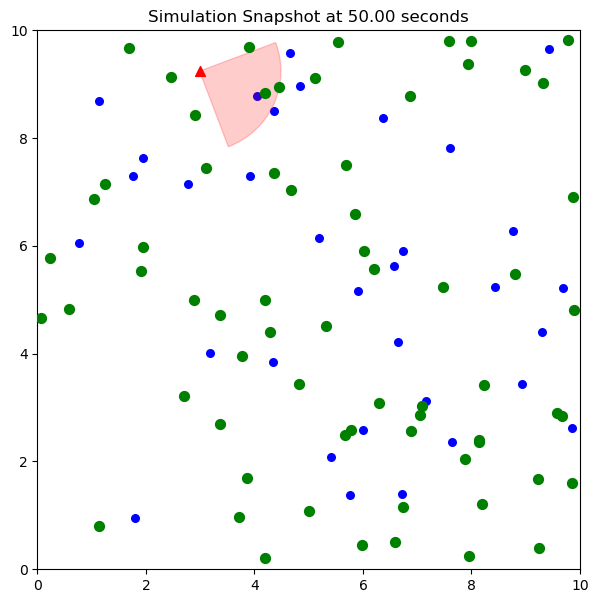

In [2]:
# plotting single snapshot (for debugging purposes)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.01  # Adjusted speed for predators
speed_prey = 0.03
simulation_duration = 10  # Total simulation duration in seconds

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    capture_distance = 0.1 * r0  # 10% of the interaction radius
    current_time = time.time()
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        for idx in prey_indices:
            if distances[idx] < capture_distance and idx not in captured_prey_indices:
                captured_prey_indices[idx] = current_time
        
        active_prey_indices = [idx for idx in prey_indices if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones

def simulate_and_capture_snapshot(simulation_duration, snapshot_time):
    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    captured_prey_indices = {}  # Reset captured prey indices
    
    start_time = time.time()
    current_time = start_time

    while current_time - start_time < snapshot_time:
        orientations_predators = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        current_time = time.time()
    
    snapshot = (current_time - start_time, positions_predators.copy(), orientations_predators.copy(), positions_prey.copy(), orientations_prey.copy(), captured_prey_indices.copy())

    # Print the number of captured prey
    print(f"Number of prey captured at {snapshot_time} seconds: {len(captured_prey_indices)}")

    return snapshot

def plot_snapshot(ax, snapshot):
    elapsed_time, positions_predators, orientations_predators, positions_prey, orientations_prey, captured_prey_indices = snapshot
    
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    for idx in captured_prey_indices:
        ax.scatter(positions_prey[idx, 0], positions_prey[idx, 1], color='green', s=50, zorder=3)  # Mark captured prey
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    for pos, orientation in zip(positions_predators, orientations_predators):
        cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
        for cone in cones:
            ax.add_patch(cone)
    
    ax.set_title(f"Simulation Snapshot at {elapsed_time:.2f} seconds")
    # Remove legend to avoid clutter
    ax.legend().remove()

# Run the simulation and capture a snapshot
snapshot_time = 50  # Time point to capture snapshot
snapshot = simulate_and_capture_snapshot(simulation_duration, snapshot_time)

# Plot the snapshot
fig, ax = plt.subplots(figsize=(7, 7))
plot_snapshot(ax, snapshot)
plt.show()


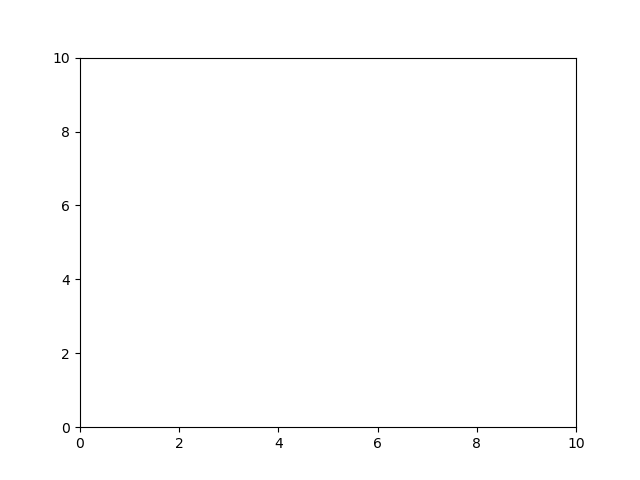

In [7]:
# removing captured prey from dict every 15 seconds, no global variables
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge
import time

class PredatorPreySimulation:
    def __init__(self, L, N_predators, N_prey, r0_predator, r0_prey, vision_angle_predator, eta_prey, delta_t, speed_predator, speed_prey, capture_duration):
        self.L = L
        self.N_predators = N_predators
        self.N_prey = N_prey
        self.r0_predator = r0_predator
        self.r0_prey = r0_prey
        self.vision_angle_predator = vision_angle_predator
        self.eta_prey = eta_prey
        self.delta_t = delta_t
        self.speed_predator = speed_predator
        self.speed_prey = speed_prey
        self.capture_duration = capture_duration
        self.captured_prey_indices = {}
        
        self.positions_predators, self.orientations_predators, self.positions_prey, self.orientations_prey = self.initialize_system()
        
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(0, self.L)
        self.ax.set_ylim(0, self.L)
        self.predators, = self.ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
        self.prey, = self.ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey
        self.vision_cones = []

    def initialize_system(self):
        positions_predators = np.random.uniform(0, self.L, (self.N_predators, 2))
        orientations_predators = np.random.uniform(-np.pi, np.pi, self.N_predators)
        positions_prey = np.random.uniform(0, self.L, (self.N_prey, 2))
        orientations_prey = np.random.uniform(-np.pi, np.pi, self.N_prey)
        return positions_predators, orientations_predators, positions_prey, orientations_prey

    def update_orientation_and_position(self, positions, orientations, speeds):
        dx = np.cos(orientations) * speeds * self.delta_t
        dy = np.sin(orientations) * speeds * self.delta_t
        positions[:, 0] += dx
        positions[:, 1] += dy
        positions[:, 0] = positions[:, 0] % self.L
        positions[:, 1] = positions[:, 1] % self.L
        return positions

    def align_orientation_with_neighbors(self, positions, orientations, predator_position, marked_prey_index=None):
        N = len(positions)
        new_orientations = np.copy(orientations)
        
        for i in range(N):
            dx = (positions[:, 0] - positions[i, 0] + self.L/2) % self.L - self.L/2
            dy = (positions[:, 1] - positions[i, 1] + self.L/2) % self.L - self.L/2
            distances = np.sqrt(dx**2 + dy**2)
            neighbors = (distances < self.r0_prey) & (distances > 0)  # Exclude self

            # Handling the predator
            predator_dx = (predator_position[0] - positions[i, 0] + self.L/2) % self.L - self.L/2
            predator_dy = (predator_position[1] - positions[i, 1] + self.L/2) % self.L - self.L/2
            predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
            
            if predator_distance < self.r0_prey:
                neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

            if i == marked_prey_index:
                if np.any(neighbors):
                    # Find the safest direction which is not towards the predator
                    safe_neighbors = neighbors.copy()
                    for j in np.where(neighbors)[0]:
                        if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < self.r0_prey:
                            safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                    if np.any(safe_neighbors):
                        nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                        target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                    else:
                        # If no safe neighbors, move directly away from the predator
                        target_orientation = np.arctan2(-predator_dy, -predator_dx)
                    
                    new_orientations[i] = target_orientation + np.random.uniform(-self.eta_prey/2, self.eta_prey/2)
                else:
                    new_orientations[i] += np.random.uniform(-self.eta_prey, self.eta_prey)
            else:
                # Standard behavior for other prey
                if np.any(neighbors):
                    average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                    new_orientations[i] = average_orientation + np.random.uniform(-self.eta_prey/2, self.eta_prey/2)
                else:
                    new_orientations[i] += np.random.uniform(-self.eta_prey, self.eta_prey)

        return new_orientations

    def update_predator_orientation(self):
        capture_distance = 0.1 * self.r0_predator  # 10% of the interaction radius
        current_time = time.time()
        for i, predator in enumerate(self.positions_predators):
            vectors_to_prey = self.positions_prey - predator
            # Adjust vectors for periodic boundary conditions
            vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + self.L / 2) % self.L - self.L / 2
            vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + self.L / 2) % self.L - self.L / 2
            
            distances = np.linalg.norm(vectors_to_prey, axis=1)
            angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
            
            angle_diffs = np.abs((angles_to_prey - self.orientations_predators[i] + np.pi) % (2 * np.pi) - np.pi)
            in_vision = (angle_diffs < self.vision_angle_predator / 2) | (angle_diffs > 2 * np.pi - self.vision_angle_predator / 2)
            in_range = distances < self.r0_predator
            
            prey_indices = np.where(in_vision & in_range)[0]
            for idx in prey_indices:
                if distances[idx] < capture_distance and idx not in self.captured_prey_indices:
                    self.captured_prey_indices[idx] = current_time
            
            active_prey_indices = [idx for idx in prey_indices if idx not in self.captured_prey_indices]
            if active_prey_indices:
                nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
                vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
                self.orientations_predators[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
        return self.orientations_predators

    def adjust_vision_cone(self, pos, orientation):
        start_angle = np.degrees(orientation - self.vision_angle_predator / 2)
        end_angle = np.degrees(orientation + self.vision_angle_predator / 2)
        cones = []

        main_cone = Wedge(pos, self.r0_predator, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(main_cone)

        def add_extra_wedge(x_offset, y_offset):
            extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
            extra_cone = Wedge(extra_pos, self.r0_predator, start_angle, end_angle, color='red', alpha=0.2)
            cones.append(extra_cone)

        if pos[0] + self.r0_predator * np.cos(orientation + self.vision_angle_predator / 2) > self.L or pos[0] + self.r0_predator * np.cos(orientation - self.vision_angle_predator / 2) > self.L:
            add_extra_wedge(-self.L, 0)
        if pos[0] + self.r0_predator * np.cos(orientation + self.vision_angle_predator / 2) < 0 or pos[0] + self.r0_predator * np.cos(orientation - self.vision_angle_predator / 2) < 0:
            add_extra_wedge(self.L, 0)

        vertical_check_angles = [orientation - self.vision_angle_predator / 2, orientation + self.vision_angle_predator / 2]
        for angle in vertical_check_angles:
            if pos[1] + self.r0_predator * np.sin(angle) > self.L:
                add_extra_wedge(0, -self.L)
            if pos[1] + self.r0_predator * np.sin(angle) < 0:
                add_extra_wedge(0, self.L)

        return cones

    def init(self):
        self.predators.set_data([], [])
        self.prey.set_data([], [])
        self.vision_cones.clear()
        return self.predators, self.prey,

    def animate(self, i):
        # Update predator orientation
        self.orientations_predators = self.update_predator_orientation()
        # Update predator position
        self.positions_predators = self.update_orientation_and_position(
            self.positions_predators, self.orientations_predators, 
            np.full(self.N_predators, self.speed_predator)
        )

        # Clear the previous frame's drawings
        self.ax.clear()
        self.ax.set_xlim(0, self.L)
        self.ax.set_ylim(0, self.L)
        
        # Check if there is at least one predator
        if len(self.orientations_predators) > 0:
            predator_orientation = self.orientations_predators[0]
            predator = self.positions_predators[0]
            
            # Calculate vectors to all prey and adjust for periodic boundaries
            vectors_to_prey = self.positions_prey - predator
            vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + self.L / 2) % self.L - self.L / 2
            vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + self.L / 2) % self.L - self.L / 2
            
            distances = np.linalg.norm(vectors_to_prey, axis=1)
            angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
            
            # Determine angle differences within the vision cone
            angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
            in_vision = (angle_diffs < self.vision_angle_predator / 2)
            
            # Filter for prey in vision and within interaction radius
            prey_in_vision_and_range = in_vision & (distances < self.r0_predator)
            
            active_prey_indices = [idx for idx in np.where(prey_in_vision_and_range)[0] if idx not in self.captured_prey_indices]
            if active_prey_indices:
                nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            else:
                nearest_prey_index = None
        else:
            nearest_prey_index = None
        
        # Update prey orientations with potential evasion behavior
        self.orientations_prey = self.align_orientation_with_neighbors(
            self.positions_prey, self.orientations_prey, 
            self.positions_predators[0], nearest_prey_index
        )
        
        # Update prey positions based on their new orientations
        self.positions_prey = self.update_orientation_and_position(
            self.positions_prey, self.orientations_prey, 
            np.full(self.N_prey, self.speed_prey)
        )
        
        # Plot all prey and mark the chased prey if identified
        self.prey.set_data(self.positions_prey[:, 0], self.positions_prey[:, 1])
        self.ax.scatter(self.positions_prey[:, 0], self.positions_prey[:, 1], color='blue', s=30)
        if nearest_prey_index is not None:
            chased_prey_position = self.positions_prey[nearest_prey_index]
            self.ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

        # Plot captured prey
        current_time = time.time()
        to_remove = []
        for idx, capture_time in self.captured_prey_indices.items():
            if current_time - capture_time > self.capture_duration:
                to_remove.append(idx)
            else:
                self.ax.scatter(self.positions_prey[idx, 0], self.positions_prey[idx, 1], color='green', s=50, zorder=3)  # Mark captured prey

        # Remove prey from captured list after capture_duration
        for idx in to_remove:
            del self.captured_prey_indices[idx]

        # Plot the predator
        self.predators.set_data(self.positions_predators[:, 0], self.positions_predators[:, 1])
        self.ax.scatter(self.positions_predators[:, 0], self.positions_predators[:, 1], color='red', marker='^', s=50)
        
        # Update vision cones
        self.vision_cones.clear()
        for pos, orientation in zip(self.positions_predators, self.orientations_predators):
            cones = self.adjust_vision_cone(pos, orientation)
            for cone in cones:
                self.ax.add_patch(cone)
                self.vision_cones.append(cone)

        return self.predators, self.prey, *self.vision_cones

    def run_simulation(self):
        self.ani = FuncAnimation(self.fig, self.animate, init_func=self.init, frames=200, interval=100, blit=False)
        plt.show()

# Run the simulation
simulation = PredatorPreySimulation(L=10, N_predators=1, N_prey=100, r0_predator=1.5, r0_prey=2, vision_angle_predator=np.pi/2, eta_prey=0.5, delta_t=1, speed_predator=0.05, speed_prey=0.03, capture_duration=15)
simulation.run_simulation()


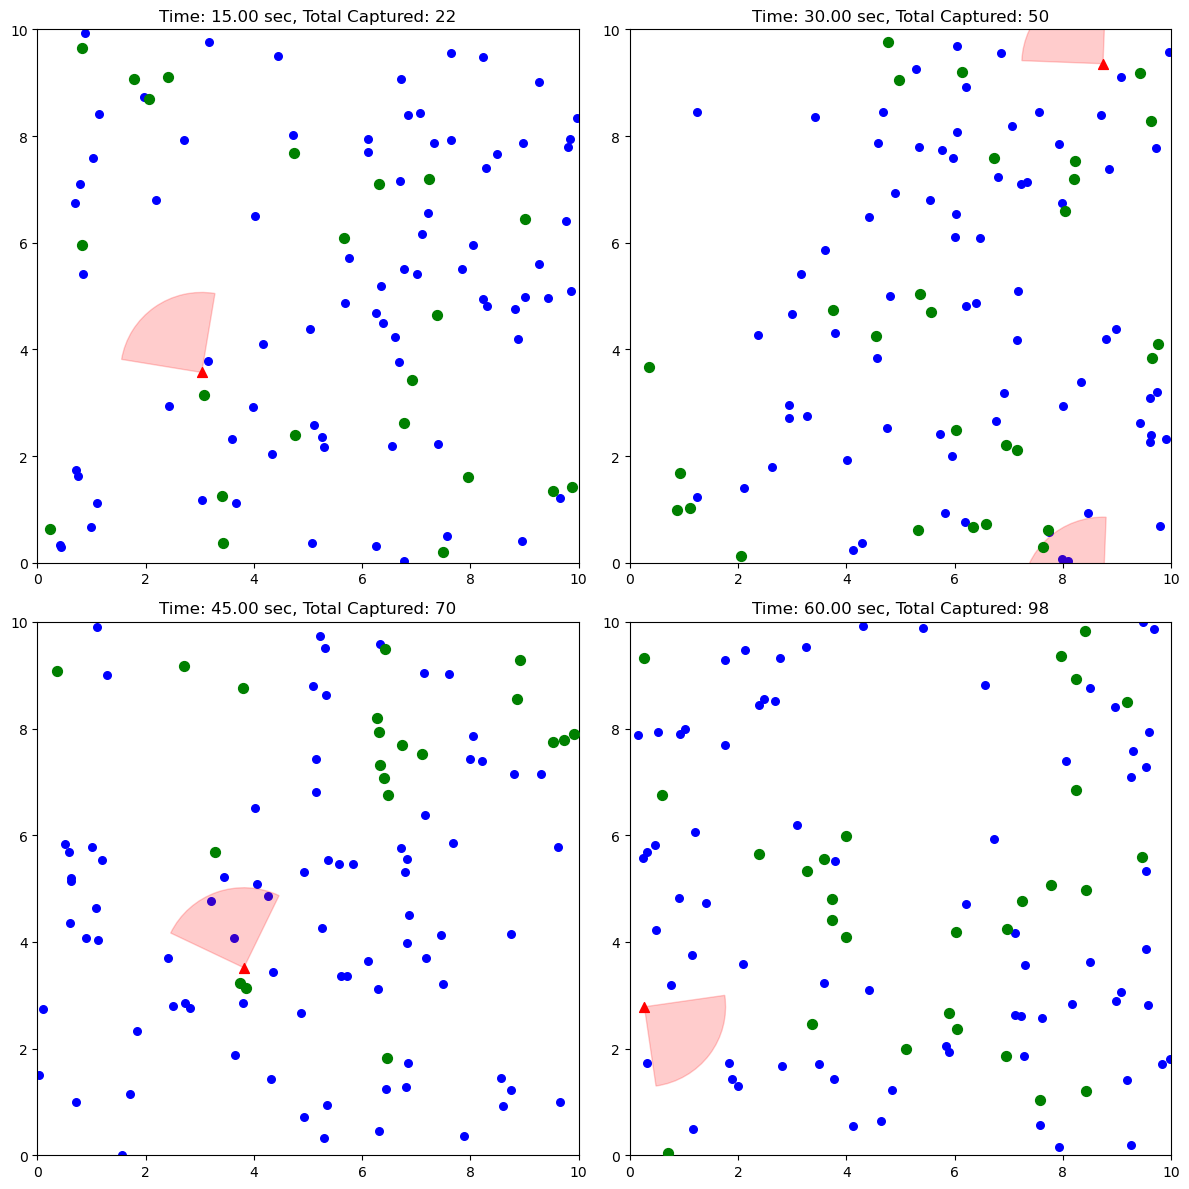

In [8]:
# snapshots at t = 15, 30, 45, 60 seconds. captured prey removed from dict every 15 seconds, printing out count of total captured prey at each time point
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.01  # Adjusted speed for predators
speed_prey = 0.03
capture_duration = 15  # Duration for which a prey remains captured (seconds)

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices, total_prey_captured):
    capture_distance = 0.1 * r0  # 10% of the interaction radius
    current_time = time.time()
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        for idx in prey_indices:
            if distances[idx] < capture_distance and idx not in captured_prey_indices:
                captured_prey_indices[idx] = current_time
                total_prey_captured += 1
        
        active_prey_indices = [idx for idx in prey_indices if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator, total_prey_captured

def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones

def simulate_and_capture_snapshots(simulation_duration, snapshot_times):
    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    captured_prey_indices = {}
    total_prey_captured = 0
    snapshots = []
    
    start_time = time.time()
    current_time = start_time
    next_snapshot_time = snapshot_times[0]
    
    while current_time - start_time < simulation_duration:
        orientations_predators, total_prey_captured = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices, total_prey_captured
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        current_time = time.time()
        elapsed_time = current_time - start_time
        
        if elapsed_time >= next_snapshot_time:
            snapshots.append((elapsed_time, positions_predators.copy(), orientations_predators.copy(), positions_prey.copy(), orientations_prey.copy(), captured_prey_indices.copy(), total_prey_captured))
            snapshot_times.pop(0)
            if snapshot_times:
                next_snapshot_time = snapshot_times[0]
            else:
                break

        # Remove prey from captured list after capture_duration
        to_remove = []
        for idx, capture_time in captured_prey_indices.items():
            if current_time - capture_time > capture_duration:
                to_remove.append(idx)
        
        for idx in to_remove:
            del captured_prey_indices[idx]
    
    return snapshots

def plot_snapshots(snapshots):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs = axs.flatten()
    
    for ax, snapshot in zip(axs, snapshots):
        elapsed_time, positions_predators, orientations_predators, positions_prey, orientations_prey, captured_prey_indices, total_prey_captured = snapshot
        
        ax.clear()
        ax.set_xlim(0, L)
        ax.set_ylim(0, L)
        ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
        for idx in captured_prey_indices:
            ax.scatter(positions_prey[idx, 0], positions_prey[idx, 1], color='green', s=50, zorder=3)  # Mark captured prey
        ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
        
        for pos, orientation in zip(positions_predators, orientations_predators):
            cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
            for cone in cones:
                ax.add_patch(cone)
        
        ax.set_title(f"Time: {elapsed_time:.2f} sec, Total Captured: {total_prey_captured}")
    
    plt.tight_layout()
    plt.show()

# Run the simulation and capture snapshots
snapshot_times = [15, 30, 45, 60]  # Time points to capture snapshots
snapshots = simulate_and_capture_snapshots(60, snapshot_times)

# Plot the snapshots
plot_snapshots(snapshots)


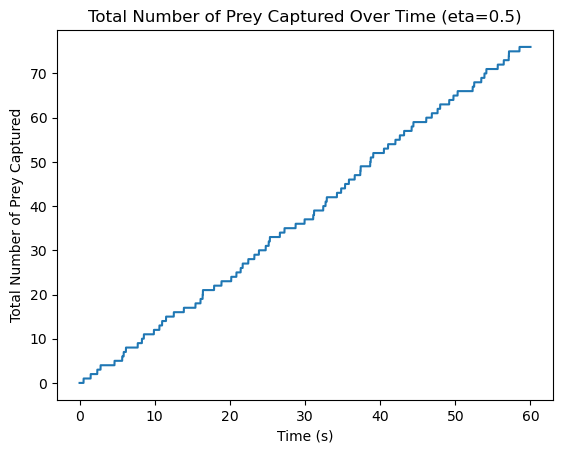

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Adjust eta_prey as needed
delta_t = 0.1
speed_predator = 0.05
speed_prey = 0.03
total_simulation_time = 60  # Total simulation time in seconds
capture_time_threshold = 15  # Time after which captured prey is released

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_dict, captured_count):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        prey_indices = [index for index in prey_indices if index not in captured_prey_dict]
        
        if prey_indices:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
            
            # Check if prey is captured
            if distances[nearest_prey_index] < 0.1 * r0:
                captured_prey_dict[nearest_prey_index] = time.time()
                captured_count += 1
    return orientations_predator, captured_count

def run_simulation(eta_prey):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, capture_times
    
    captured_prey_dict = {}
    captured_count = 0
    captured_counts = []
    time_stamps = []
    
    start_time = time.time()
    current_time = start_time

    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    
    while current_time - start_time < total_simulation_time:
        orientations_predators, captured_count = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_dict, captured_count
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        # Remove captured prey from captured_prey_dict after 15 seconds
        for prey_index in list(captured_prey_dict):
            if time.time() - captured_prey_dict[prey_index] > capture_time_threshold:
                del captured_prey_dict[prey_index]
        
        captured_counts.append(captured_count)
        time_stamps.append(current_time - start_time)
        
        current_time = time.time()
    
    return captured_counts, time_stamps

# Run simulation and plot results for a single eta_prey value
eta_prey = 0.5  # Change this value to test different noise levels
captured_counts, time_stamps = run_simulation(eta_prey)

# Plot the final value of captured_count
plt.figure()
plt.plot(time_stamps, captured_counts)
plt.xlabel("Time (s)")
plt.ylabel("Total Number of Prey Captured")
plt.title(f"Total Number of Prey Captured Over Time (eta={eta_prey})")
plt.show()


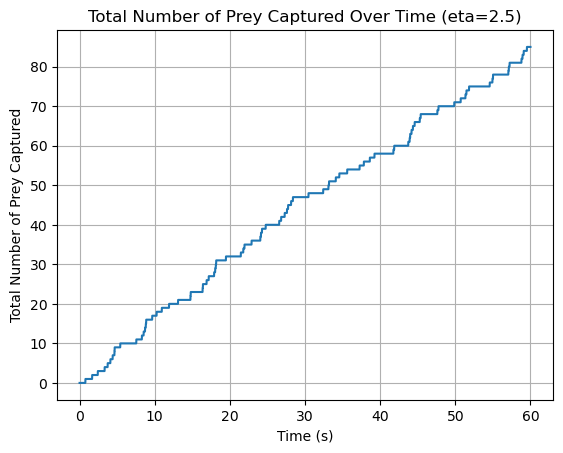

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
delta_t = 1
speed_predator = 0.01  # Adjusted speed for predators
speed_prey = 0.03
total_simulation_time = 60  # Total simulation duration in seconds
capture_time_threshold = 15  # Time after which captured prey is released

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)

        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    capture_distance = 0.1 * r0  # 10% of the interaction radius
    total_captured_count = 0
    current_time = time.time()
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        for idx in prey_indices:
            if distances[idx] < capture_distance and idx not in captured_prey_indices:
                captured_prey_indices[idx] = current_time
                total_captured_count += 1
        
        active_prey_indices = [idx for idx in prey_indices if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    
    return orientations_predator, total_captured_count

def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones

def run_simulation(eta_prey):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, capture_times
    
    captured_prey_indices = {}
    total_captured_count = 0
    captured_counts = []
    time_stamps = []
    
    start_time = time.time()
    current_time = start_time

    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    
    # Run the simulation and collect data
    while current_time - start_time < total_simulation_time:
        orientations_predators, captured_count = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        # Remove captured prey from captured_prey_indices after 15 seconds
        for prey_index in list(captured_prey_indices):
            if time.time() - captured_prey_indices[prey_index] > capture_time_threshold:
                del captured_prey_indices[prey_index]
        
        total_captured_count += captured_count
        captured_counts.append(total_captured_count)
        time_stamps.append(current_time - start_time)
        
        current_time = time.time()
    
    return captured_counts, time_stamps

# Function to plot results
def plot_results(time_stamps, captured_counts, eta_prey):
    plt.figure()
    plt.plot(time_stamps, captured_counts)
    plt.xlabel("Time (s)")
    plt.ylabel("Total Number of Prey Captured")
    plt.title(f"Total Number of Prey Captured Over Time (eta={eta_prey})")
    plt.yticks(range(0, max(captured_counts)+5, 10))  # Adjust y-axis tick marks
    plt.grid(True)
    plt.show()

# Run the simulation and plot results
eta_prey = 2.5  # Change this value to test different noise levels
captured_counts, time_stamps = run_simulation(eta_prey)

plot_results(time_stamps, captured_counts, eta_prey)


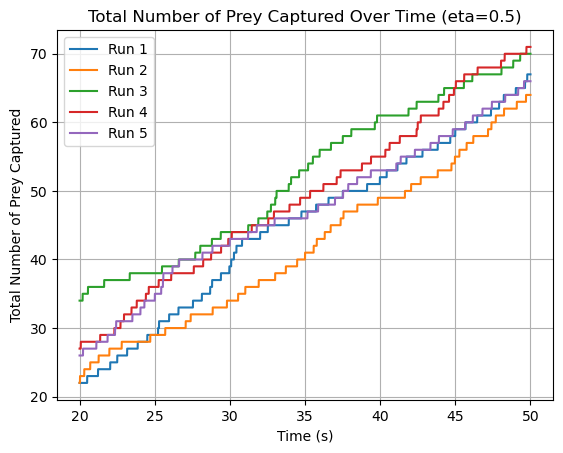

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
delta_t = 0.1
speed_predator = 0.05
speed_prey = 0.03
initial_simulation_time = 20  # Initial simulation time in seconds (no data collection)
data_collection_time = 30  # Data collection time in seconds

# Initialize capture_times and captured_count globally
capture_times = {}
captured_count = 0

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    global captured_count
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        prey_indices = [index for index in prey_indices if index not in captured_prey_indices]
        
        if prey_indices:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
            
            # Check if prey is captured
            if distances[nearest_prey_index] < 0.1 * r0:
                captured_prey_indices.append(nearest_prey_index)
                capture_times[nearest_prey_index] = time.time()
                captured_count += 1  # Increment the captured count
    return orientations_predator

def run_simulation(eta_prey):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, capture_times, captured_count
    
    # Initialize the system before starting the simulation
    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    captured_prey_indices = []
    capture_times = {}
    captured_count = 0
    captured_counts = []
    
    start_time = time.time()
    current_time = start_time

    # Initial simulation (20 seconds)
    while current_time - start_time < initial_simulation_time:
        orientations_predators = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        current_time = time.time()

    # Start collecting data for 30 seconds after initial simulation
    start_data_collection_time = current_time
    time_stamps = []

    while current_time - start_data_collection_time < data_collection_time:
        orientations_predators = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        # Remove captured prey from captured_prey_indices after 15 seconds
        for prey_index in list(captured_prey_indices):
            if time.time() - capture_times[prey_index] > 15:
                captured_prey_indices.remove(prey_index)
        
        captured_counts.append(captured_count)
        time_stamps.append(current_time - start_data_collection_time + initial_simulation_time)
        
        current_time = time.time()
    
    return captured_counts, time_stamps

def run_multiple_simulations(eta_prey, num_runs):
    all_captured_counts = []
    all_time_stamps = []

    for _ in range(num_runs):
        captured_counts, time_stamps = run_simulation(eta_prey)
        all_captured_counts.append(captured_counts)
        all_time_stamps.append(time_stamps)

    return all_captured_counts, all_time_stamps

# Run multiple simulations and plot the results
eta_prey = 0.5  # Change this value to test different noise levels
num_runs = 5  # Number of simulation runs

all_captured_counts, all_time_stamps = run_multiple_simulations(eta_prey, num_runs)

# Plot all the runs
plt.figure()
for i in range(num_runs):
    plt.plot(all_time_stamps[i], all_captured_counts[i], label=f'Run {i+1}')
plt.xlabel("Time (s)")
plt.ylabel("Total Number of Prey Captured")
plt.title(f"Total Number of Prey Captured Over Time (eta={eta_prey})")
plt.legend()
plt.grid(True)
plt.show()


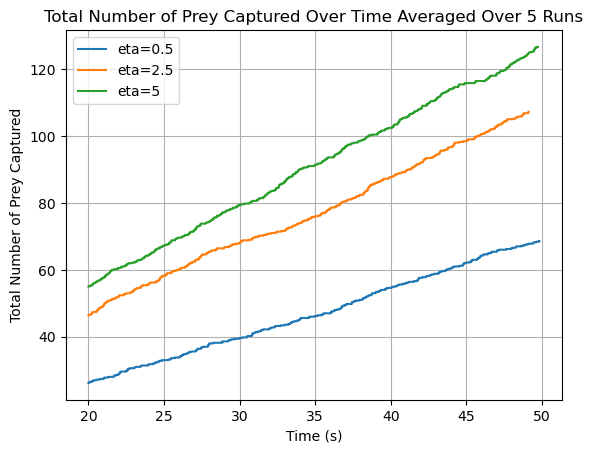

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
delta_t = 0.1
speed_predator = 0.05
speed_prey = 0.03
initial_simulation_time = 20  # Initial simulation time in seconds (no data collection)
data_collection_time = 30  # Data collection time in seconds
capture_time_threshold = 15  # Time after which captured prey is released

# Initialize capture_times and captured_count globally
capture_times = {}
captured_count = 0

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    global captured_count
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        prey_indices = [index for index in prey_indices if index not in captured_prey_indices]
        
        if prey_indices:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
            
            # Check if prey is captured
            if distances[nearest_prey_index] < 0.1 * r0:
                captured_prey_indices.append(nearest_prey_index)
                capture_times[nearest_prey_index] = time.time()
                captured_count += 1  # Increment the captured count
    return orientations_predator

def run_simulation(eta_prey):
    global positions_predators, orientations_predators, positions_prey, orientations_prey, capture_times, captured_count
    
    # Initialize the system before starting the simulation
    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    captured_prey_indices = []
    capture_times = {}
    captured_count = 0
    captured_counts = []
    
    start_time = time.time()
    current_time = start_time

    # Initial simulation (20 seconds)
    while current_time - start_time < initial_simulation_time:
        orientations_predators = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        current_time = time.time()

    # Start collecting data for 30 seconds after initial simulation
    start_data_collection_time = current_time
    time_stamps = []

    while current_time - start_data_collection_time < data_collection_time:
        orientations_predators = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
        
        # Remove captured prey from captured_prey_indices after 15 seconds
        for prey_index in list(captured_prey_indices):
            if time.time() - capture_times[prey_index] > 15:
                captured_prey_indices.remove(prey_index)
        
        captured_counts.append(captured_count)
        time_stamps.append(current_time - start_data_collection_time + initial_simulation_time)
        
        current_time = time.time()
    
    return captured_counts, time_stamps

def run_multiple_simulations(eta_prey, num_runs):
    all_captured_counts = []
    all_time_stamps = []

    for _ in range(num_runs):
        captured_counts, time_stamps = run_simulation(eta_prey)
        all_captured_counts.append(captured_counts)
        all_time_stamps.append(time_stamps)

    # Make sure all captured_counts and time_stamps lists have the same length
    min_length = min(len(c) for c in all_captured_counts)
    all_captured_counts = [c[:min_length] for c in all_captured_counts]
    all_time_stamps = [t[:min_length] for t in all_time_stamps]

    # Average the results across all runs
    avg_captured_counts = np.mean(all_captured_counts, axis=0)
    avg_time_stamps = np.mean(all_time_stamps, axis=0)

    return avg_captured_counts, avg_time_stamps

# Run multiple simulations and plot the averaged results for different eta_prey values
eta_values = [0.5, 2.5, 5]  # Different eta_prey values
num_runs = 5  # Number of simulation runs to average

plt.figure()

for eta in eta_values:
    avg_captured_counts, avg_time_stamps = run_multiple_simulations(eta, num_runs)
    plt.plot(avg_time_stamps, avg_captured_counts, label=f'eta={eta}')

plt.xlabel("Time (s)")
plt.ylabel("Total Number of Prey Captured")
plt.title("Total Number of Prey Captured Over Time Averaged Over 5 Runs")
plt.legend()
plt.grid(True)
plt.show()

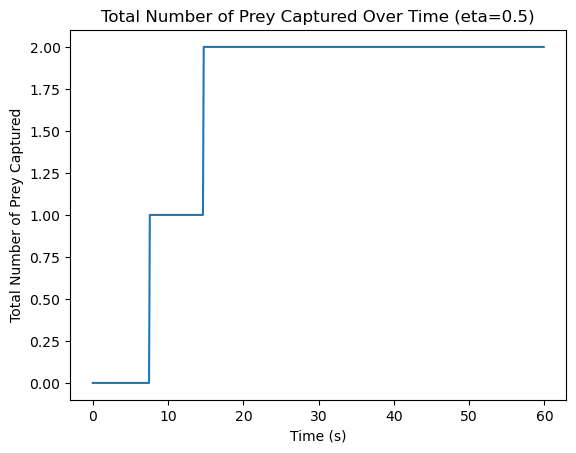

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5
r0_prey = 2
vision_angle_predator = np.pi / 2
eta_prey = 0.5
delta_t = 0.1
speed_predator = 0.05
speed_prey = 0.03
total_simulation_time = 60
capture_time_threshold = 15

# Real-world time per step (in seconds)
real_world_time_per_step = 0.1

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)

        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L, captured_prey_indices):
    capture_distance = 0.1 * r0
    total_captured_count = 0
    current_time = time.time()
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        for idx in prey_indices:
            if distances[idx] < capture_distance and idx not in captured_prey_indices:
                captured_prey_indices[idx] = current_time
                total_captured_count += 1
        
        active_prey_indices = [idx for idx in prey_indices if idx not in captured_prey_indices]
        if active_prey_indices:
            nearest_prey_index = active_prey_indices[np.argmin(distances[active_prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    
    return orientations_predator, total_captured_count

def run_simulation():
    captured_prey_indices = {}
    total_captured_count = 0
    captured_counts = []
    time_stamps = []
    
    positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
    
    start_time = time.time()
    current_time = start_time

    while current_time - start_time < total_simulation_time:
        step_start_time = time.time()
        
        orientations_predators, captured_count = update_predator_orientation(
            positions_predators, positions_prey, orientations_predators, 
            vision_angle_predator, r0_predator, L, captured_prey_indices
        )
        positions_predators = update_orientation_and_position(
            positions_predators, orientations_predators, 
            np.full(N_predators, speed_predator), L
        )
        
        orientations_prey = align_orientation_with_neighbors(
            positions_prey, orientations_prey, L, r0_prey, eta_prey, 
            positions_predators[0]
        )
        positions_prey = update_orientation_and_position(
            positions_prey, orientations_prey, 
            np.full(N_prey, speed_prey), L
        )
        
        for prey_index in list(captured_prey_indices):
            if time.time() - captured_prey_indices[prey_index] > capture_time_threshold:
                del captured_prey_indices[prey_index]
        
        total_captured_count += captured_count
        captured_counts.append(total_captured_count)
        time_stamps.append(current_time - start_time)
        
        step_end_time = time.time()
        time_to_wait = real_world_time_per_step - (step_end_time - step_start_time)
        if time_to_wait > 0:
            time.sleep(time_to_wait)
        
        current_time = time.time()
    
    return captured_counts, time_stamps

# Run the simulation and plot results
captured_counts, time_stamps = run_simulation()

# Plot the total number of prey captured over time
plt.figure()
plt.plot(time_stamps, captured_counts)
plt.xlabel("Time (s)")
plt.ylabel("Total Number of Prey Captured")
plt.title(f"Total Number of Prey Captured Over Time (eta={eta_prey})")
plt.show()
